<p style="font-size:11px;"><em><strong>Créditos</strong>: El contenido de este cuaderno ha sido tomado de varias fuentes, pero especialmente de <a href="https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py">scikit-learn1</a>, <a href="https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_compare_gpr_krr.html#sphx-glr-auto-examples-gaussian-process-plot-compare-gpr-krr-py">sciki-learn2</a>, <a href="https://domino.ai/blog/fitting-gaussian-process-models-python">Chris Fonnesbeck</a>, <a href="https://github.com/jwangjie/Gaussian-Process-Regression-Tutorial/blob/master/gpr_tutorial.ipynb">Jie Wang, Offroad Robotics, Queen's University</a>, <a href="https://nbviewer.org/github/adamian/adamian.github.io/blob/master/talks/Brown2016.ipynb">Andreas Damianou - Brown University</a>. El compilador se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento.</em></p>

# Procesos Gaussianos con Python

Una variable aleatoria $X$ se dice que está distribuida normalmente con media $\mu$ y varianza $\sigma^2$ si su función de densidad de probabilidad (PDF) es:
 
$$ P_X(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{\left(-\frac{{\left(x - \mu \right)}^{2}}{2 \sigma^{2}}\right)}$$

La distribución Gaussiana o Normal de $X$ se suele representar por $ P(x) ~ \sim\mathcal{N}(\mu, \sigma^2) = 0$.

Los Procesos Gaussianos (GP) es una técnica de regresión no paramétrica poderosa y flexible utilizada en aprendizaje automático y estadística. Es particularmente útil cuando se trata de problemas que involucran datos continuos, donde la relación entre las variables de entrada y la salida no se conoce explícitamente o puede ser compleja. La GP es un enfoque Bayesiano que puede modelar la certeza en las predicciones, lo que la convierte en una herramienta valiosa para diversas aplicaciones.

La RGP se basa en el concepto de un proceso Gaussiano, que es una colección de variables aleatorias, cualquiera de las cuales en un número finito tiene una distribución Gaussiana conjunta. Un proceso Gaussiano se puede pensar como una distribución de funciones.

### Características de los Procesos Gaussianos (GP)

Los procesos Gaussianos (GP) son una técnica poderosa y flexible utilizada en aprendizaje automático y estadística. A continuación se presentan algunas de sus características principales:

**1. Naturaleza No Paramétrica:** A diferencia de otros modelos que requieren un número fijo de parámetros, los GPs pueden adaptarse a la complejidad de los datos. Esto los hace versátiles para modelar relaciones no lineales y complejas entre las variables de entrada y salida.

**2. Predicciones Probabilísticas:** Los GPs no solo proporcionan un valor puntual de predicción, sino que también generan una distribución de probabilidad para dicho valor. Esto permite cuantificar la incertidumbre asociada a las predicciones, siendo una información muy valiosa en muchos escenarios.

**3. Interpolación y Suavizado:** Los GPs son particularmente útiles para trabajar con datos ruidosos o muestreados de forma irregular. Gracias a su capacidad de suavizar el ruido y predecir valores intermedios entre los datos observados, se convierten en una herramienta adecuada para este tipo de problemas.

**4. Marginalización de Hiperparámetros:** En lugar de necesitar un ajuste manual de los hiperparámetros del modelo (parámetros que controlan su comportamiento general), los GPs los marginalizan. Esto significa que integran sobre todos los valores posibles de los hiperparámetros, simplificando el proceso de ajuste del modelo.

#### Función Media en Procesos Gaussianos (GP)

En la regresión por procesos Gaussianos (GP), la **función media** representa el valor predicho de la función que se está modelando para cada punto de entrada. Funciona como una suposición inicial sobre la estructura subyacente de los datos. Por defecto, la función media suele establecerse en cero, aunque no necesariamente siempre es así, y se puede modificar en función de las propiedades de los datos o la experiencia del dominio. Al afectar la tendencia central de las predicciones, ayuda a los profesionales a identificar patrones o tendencias en los datos. Al incorporar la función media, los GP proporcionan predicciones probabilísticas que contienen incertidumbre, además de estimaciones puntuales.


#### Función de Co covarianza (Kernel) en Procesos Gaussianos (GP)

La **función de covarianza**, también conocida como **función kernel**, mide la similitud entre los puntos de datos de entrada en los procesos Gaussianos (GP). Es crucial para caracterizar el comportamiento del modelo GP, ya que afecta la selección de funciones de la distribución previa. La función de covarianza mide las similitudes por pares para determinar la correlación entre los valores de la función. Los GP pueden adaptarse a una amplia gama de patrones de datos, desde tendencias suaves hasta estructuras complejas, debido a que diferentes funciones kernel capturan distintos tipos de correlaciones. La elección del kernel puede tener un gran impacto en el rendimiento del modelo.

In [1]:
import pip
pip.main(['install','GPy'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: GPy in c:\users\edier\miniconda3\lib\site-packages (1.13.2)

Requirement already satisfied: numpy<2.0.0,>=1.7 in c:\users\edier\miniconda3\lib\site-packages (from GPy) (1.25.1)

Requirement already satisfied: six in c:\users\edier\miniconda3\lib\site-packages (from GPy) (1.16.0)

Requirement already satisfied: paramz>=0.9.6 in c:\users\edier\miniconda3\lib\site-packages (from GPy) (0.9.6)

Requirement already satisfied: cython>=0.29 in c:\users\edier\miniconda3\lib\site-packages (from GPy) (3.0.11)

Requirement already satisfied: scipy<=1.12.0,>=1.3.0 in c:\users\edier\miniconda3\lib\site-packages (from GPy) (1.11.3)

Requirement already satisfied: decorator>=4.0.10 in c:\users\edier\appdata\roaming\python\python311\site-packages (from paramz>=0.9.6->GPy) (5.1.1)

0

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import numpy as np
import scipy as sp
import pandas as pd
from scipy.stats import multivariate_normal
import GPy
from matplotlib.pyplot import figure
import seaborn as sns
import scipy

from sklearn.metrics import mean_squared_error as mse
from scipy.stats import normaltest
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random

from scipy import linalg
## check version
import sys
import sklearn
from sklearn.gaussian_process import kernels

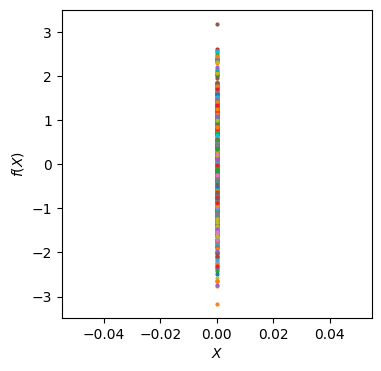

In [3]:
n = 1         # n number of independent 1-D gaussian 
m= 1000       # m points in 1-D gaussian  
f_random = np.random.normal(size=(n, m))

X = np.linspace(0, 1, n).reshape(-1,1)   # n points in the range of (0, 1)

plt.figure(figsize=(4, 4))
plt.plot(X, f_random, 'o', linewidth=1, markersize=1, markeredgewidth=2)
plt.xlabel('$X$')
plt.ylabel('$f(X)$')
plt.show()

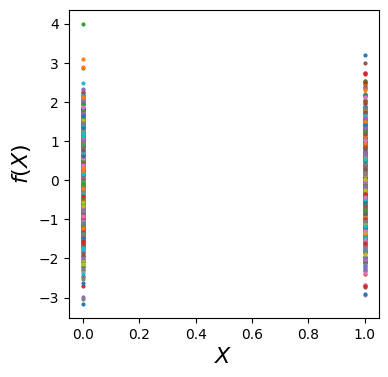

In [4]:
n = 2          # en este caso n funciones Gaussianas
m = 1000       # cada una de m puntos
f_random = np.random.normal(size=(n, m))

X = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.figure(figsize=(4, 4))
plt.plot(X, f_random, 'o', linewidth=1, markersize=1, markeredgewidth=2)
plt.xlabel(r'$X$', fontsize = 16)
plt.ylabel(r'$f(X)$', fontsize = 16)
plt.show()

A continuación, podemos graficar múltiples Gaussianas independientes. Por ejemplo, colocar el vector $X_1$ en $X = 0$ y otro vector $X_2$ en $X = 1$. Ten en cuenta que tanto el vector $X_1$ como el vector $X_2$ son Gaussianos.

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/2gaussian.png?raw=1" width="500"/> 

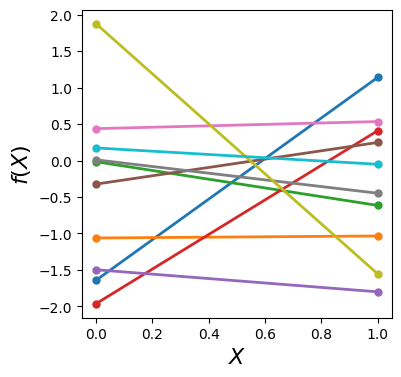

In [5]:
n = 2          
m = 10
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)

plt.figure(figsize=(4, 4))
plt.plot(Xshow, f_random, '-o', linewidth=2, markersize=4, markeredgewidth=2)
plt.xlabel(r'$X$', fontsize = 16)
plt.ylabel(r'$f(X)$', fontsize = 16);

Estas líneas se parecen a **funciones** para cada par de puntos. Por otro lado, la gráfica también parece como si estuviéramos muestreando la región $[0, 1]$ con 10 funciones lineales, aunque solo haya dos puntos en cada línea. Desde la perspectiva del muestreo, el dominio $[0, 1]$ es nuestra región de interés, es decir, la región específica en la que realizamos nuestra regresión. Este muestreo se vuelve aún más claro si generamos más variables Gaussianas independientes y conectamos los puntos en orden mediante líneas.

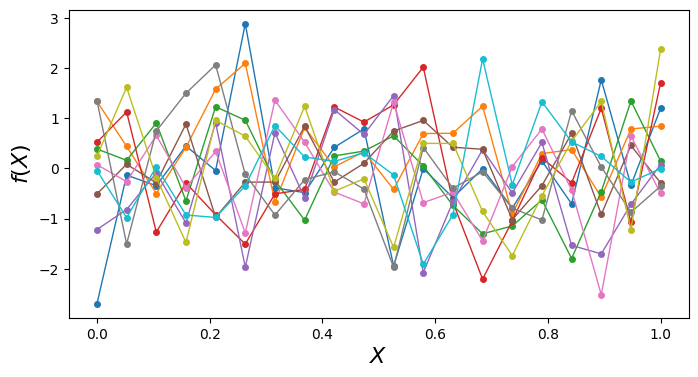

In [6]:
n = 20          
m = 10
f_random = np.random.normal(size=(n, m))

Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)

plt.figure(figsize=(8, 4))
plt.plot(Xshow, f_random, '-o', linewidth=1, markersize=3, markeredgewidth=2)
plt.xlabel(r'$X$', fontsize = 16)
plt.ylabel(r'$f(X)$', fontsize = 16)
plt.show()

¿Qué estamos intentando hacer al conectar puntos Gaussianos independientes generados aleatoriamente? Aunque estas líneas parecen funciones, son demasiado ruidosas. Si $X$ es nuestro espacio de entrada, estas funciones no tienen sentido para la tarea de regresión. No podemos hacer ninguna predicción utilizando estas funciones. Las funciones deberían ser más suaves, lo que significa que los puntos de entrada que están cerca entre sí deberían tener valores similares en la función.

Por lo tanto, las funciones obtenidas al conectar Gaussianas independientes no son adecuadas para la regresión; necesitamos Gaussianas que estén correlacionadas entre sí. ¿Cómo describimos una Gaussiana conjunta? Mediante una Gaussiana multivariabl

En algunas situaciones, un sistema (conjunto de datos) debe describirse mediante más de una variable característica $[x_1, x_2, \ldots, x_n]$, y estas variables están correlacionadas entre sí. Si queremos modelar los datos como una Gaussiana de una sola vez, necesitamos una Gaussiana multivariante. Aquí hay ejemplos de la Gaussiana en 2D. 


La Gaussiana en 2D se puede visualizar como una curva en forma de campana tridimensional, donde las alturas representan la densidad de probabilidad. La función $P(x_1, x_2)$ es la [distribución conjunta de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_conjunta_de_probabilidad#Funci%C3%B3n_de_densidad_o_de_masa).

<div id="image-table">
    <table>
	    <tr>
    	    <td style="padding:10px">
        	    <img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/2d_gaussian3D_0.8.png?raw=1" width="400"/>
      	    </td>
            <td style="padding:10px">
            	<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/2d_gaussian_0.8.png?raw=1" width="380"/>
            </td>
        </tr>
    </table>
</div> 

Formalmente, la Gaussiana multivaria se expresa como:

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/mul_var_gaussian.png?raw=1" width="400"/>

El `vector de medias` $\mu$ es un vector 2D $(\mu_1, \mu_2)$, que son las medias independientes de cada variable $x_1$ y $x_2$.

La matriz de covarianza de la Gaussiana en 2D es $\begin{pmatrix} \sigma^2_1 & \sigma_{12} \\ \sigma_{21} & \sigma^2_2 \end{pmatrix}$. Los términos diagonales son las varianzas independientes de cada variable, $x_1$ y $x_2$. Los términos fuera de la diagonal representan las correlaciones entre las dos variables. Un componente de correlación indica cuánto está relacionada una variable con otra.

Una Gaussiana en 2D se puede expresar como:
$$ \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \sim \mathcal{N}\left(\begin{pmatrix} \mu1 \\ \mu_2 \end{pmatrix}, \begin{pmatrix} \sigma^2_1 & \sigma_{12} \\ \sigma_{21} & \sigma^2_2 \end{pmatrix}\right) \sim \mathcal{N}(\mu, \Sigma)$$

Cuando tenemos una Gaussiana en $N$ dimensiones, la matriz de covarianza $\Sigma$ es de $N×N$ y su elemento $(i,j)$ es $\Sigma_{ij}=cov(y_i,y_j)$. La matriz $\Sigma$ es simétrica y almacena las covarianzas por pares de todas las variables aleatorias modeladas conjuntamente.e.

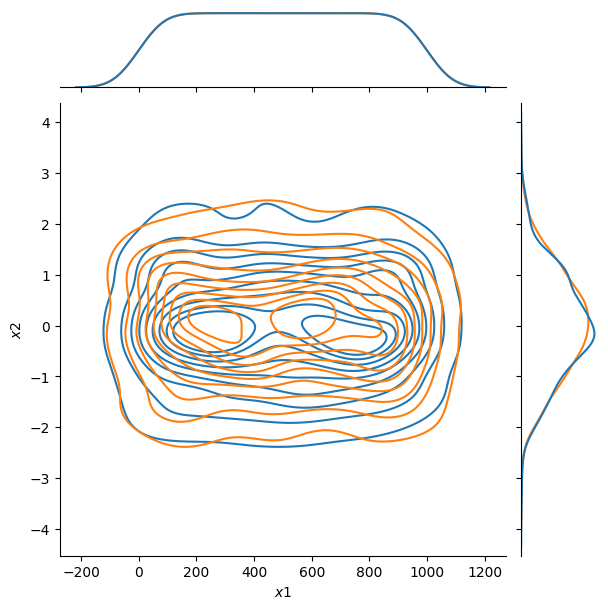

In [7]:
mean, cov = [0., 0.], [(1., -0.6), (-0.6, 1.)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x1", "x2"])
g = sns.jointplot(data=df, kind="kde")
g.set_axis_labels("$x1$", "$x2$");
g.ax_joint.legend_.remove()
plt.show()

Queremos suavizar las funciones de muestreo definiendo las funciones de covarianza. Considerando el hecho de que cuando dos vectores son similares, el valor de salida de su producto punto es alto. Esto se puede ver claramente en la ecuación del producto punto $A\,B = AB\,cos\theta$, donde $\theta$ es el ángulo entre dos vectores. Si un algoritmo se define únicamente en términos de productos internos en el espacio de entrada, entonces se puede elevar al espacio de características reemplazando las ocurrencias de esos productos internos por $k(x,\ x^\prime)$; llamamos a $k(\bullet,\bullet)$ una función núcleo.

Una función de covarianza popular (también conocida como función núcleo) es el kernel exponencial cuadrado, también llamado kernel de función de base radial (RBF) o kernel gaussiano, definido como:

$$ cov(x_i, x_j)=\exp\left(-~\frac{(x_i-x_j)^2}{2}\right)$$

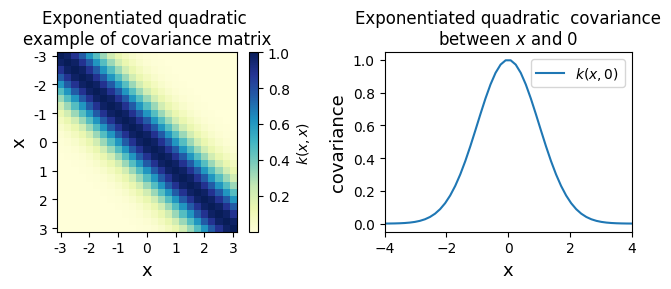

In [8]:
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)

# Illustrate covariance matrix and function
# Show covariance matrix example from exponentiated quadratic
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
xlim = (-3, 3)
X = np.expand_dims(np.linspace(*xlim, 25), 1)
Σ = exponentiated_quadratic(X, X)
# Plot covariance matrix
im = ax1.imshow(Σ, cmap=cm.YlGnBu)
cbar = plt.colorbar(
    im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x,x)$', fontsize=10)
ax1.set_title(('Exponentiated quadratic \n' 'example of covariance matrix'))
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('x', fontsize=13)
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.grid(False)

# Show covariance with X=0
xlim = (-4, 4)
X = np.expand_dims(np.linspace(*xlim, num=50), 1)
zero = np.array([[0]])
Σ0 = exponentiated_quadratic(X, zero)
ax2.plot(X[:,0], Σ0[:,0], label='$k(x,0)$')
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('covariance', fontsize=13)
ax2.set_title(('Exponentiated quadratic  covariance\n' 'between $x$ and $0$'))
# ax2.set_ylim([0, 1.1])
ax2.set_xlim(*xlim)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()

Volvamos a trazar 20 Gaussianas independientes conectando los puntos en orden mediante líneas. En lugar de generar 20 Gaussianas independientes como antes, realizamos el gráfico de una Gaussiana en 20 dimensiones con una matriz de covarianza identidad.

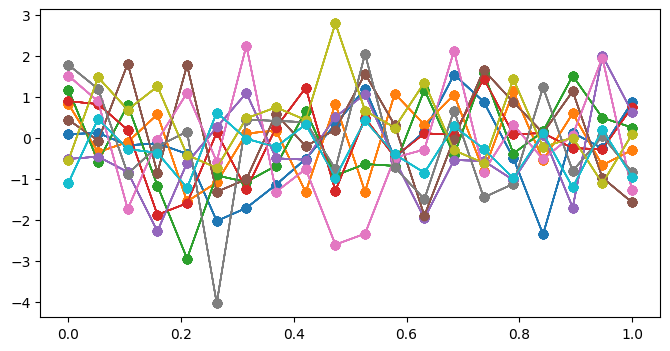

In [9]:
n = 20 
m = 10
mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, cov, m).T

plt.figure(figsize=(8, 4))
X = np.linspace(0, 1, n).reshape(-1,1)
for i in range(m):
    plt.plot(X, f_prior, '-o', linewidth=1)
    

Obtuvimos exactamente el mismo gráfico como se esperaba. Ahora, kernelicemos nuestras funciones utilizando la RBF como nuestra covarianza.

In [10]:
# Define the kernel
def kernel(a, b):
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.exp(-.5 * sqdist)

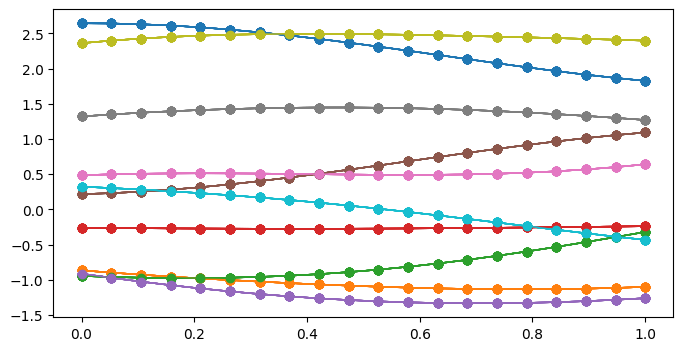

In [11]:
n = 20  
m = 10
X = np.linspace(0, 1, n).reshape(-1,1)   
K_ = kernel(Xshow, Xshow)                  # k(x_star, x_star)        
mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.figure(figsize=(8, 4))
Xshow = np.linspace(0, 1, n).reshape(-1,1)   # n number test points in the range of (0, 1)
for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1)
    

Obtenemos líneas mucho más suaves que se asemejan más a funciones. Cuando la dimensión de la Gaussiana aumenta, ya no es necesario conectar puntos. Cuando la dimensión se vuelve infinita, hay un punto que representa cualquier entrada posible. Vamos a graficar `m=200` muestras de una Gaussiana de `n=200$-D$` para tener una idea de cómo se ven las funciones con infinitos parámetros. 

In [12]:
n = 200         
m = 200
X = np.linspace(0, 1, n).reshape(-1,1)   
K_ = kernel(X, X)                    # k(x_star, x_star)        
mean = np.zeros(n)
cov = np.eye(n)

f_prior = np.random.multivariate_normal(mean, K_, m).T

plt.figure(figsize=(16,8))
for i in range(m):
    plt.plot(X, f_prior, 'o', linewidth=1, markersize=2, markeredgewidth=1)
plt.title('200 samples of the 200-D gaussian kernelized prior');

Error in callback <function flush_figures at 0x00000183A25AA840> (for post_execute):


KeyboardInterrupt: 

Para generar muestras aleatorias normales correlacionadas, se pueden generar primero muestras no correlacionadas y luego multiplicarlas por una matriz *L* tal que $L L^T = K$, donde *K* es la matriz de covarianza deseada. La matriz *L* se puede obtener, por ejemplo, utilizando la descomposición de Cholesky de *K*.

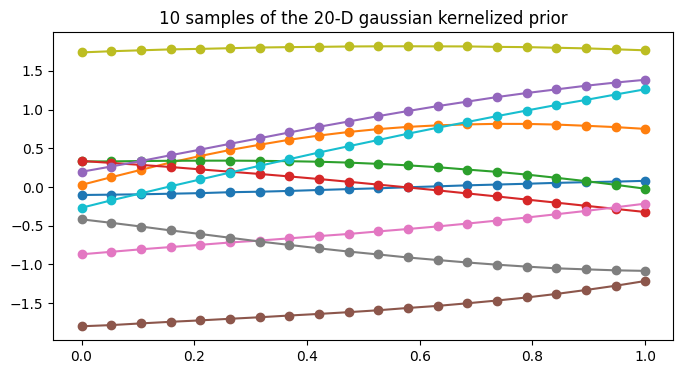

In [13]:
n = 20      
m = 10
X = np.linspace(0, 1, n).reshape(-1,1)  
K_ = kernel(X, X)                
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))

f_prior = np.dot(L, np.random.normal(size=(n,m)))

plt.figure(figsize=(8,4))
plt.plot(X, f_prior, '-o')
plt.title('10 samples of the 20-D gaussian kernelized prior');

Primero, volvamos a nuestra tarea de regresión. Hay una función $\mathbf{f}$ que intentamos modelar dado un conjunto de puntos de datos $\mathbf{X}$ (datos de entrenamiento/observados existentes) provenientes de la función desconocida $\mathbf{f}$. Los métodos tradicionales de regresión no lineal en aprendizaje automático típicamente dan una única función que consideran como la mejor para ajustar estas observaciones. Pero, como se mostró al principio, puede haber más de una función que ajuste las observaciones igualmente bien.

En segundo lugar, revisemos lo que obtuvimos de la MVN. Tuvimos la sensación de que cuando la dimensión del Gaussiano es infinita, podemos muestrear toda la región de interés con funciones aleatorias. Estas funciones aleatorias infinitas son MVN porque es nuestra suposición (priori). Más formalmente, la distribución a priori de estas funciones aleatorias infinitas es MVN. La distribución a priori representa el tipo de salidas $\mathbf{f}$ que esperamos ver sobre algunos inputs $\mathbf{x}$ sin siquiera observar datos.

Cuando tenemos puntos de observación, en lugar de funciones aleatorias infinitas, solo conservamos aquellas funciones que se ajustan a estos puntos. Ahora tenemos nuestra posterior, la creencia actual basada en las observaciones existentes. Cuando obtenemos más puntos de observación, utilizamos nuestra posterior anterior como nuestra a priori, y usamos estas nuevas observaciones para actualizar nuestra posterior.

Esto es **Proceso Gaussiano**.

***Un proceso Gaussiano es una distribución de probabilidad sobre funciones posibles que se ajustan a un conjunto de puntos.***

Dado que tenemos la distribución de probabilidad sobre todas las posibles funciones, podemos calcular **la media como la función** y calcular la varianza para mostrar cuán confiables son nuestras predicciones usando la función.

Recuerda:
* Las funciones (posterior) se actualizan con nuevas observaciones.
* La media calculada por la distribución posterior de las posibles funciones es la función utilizada para la regresión.
* La función está modelada por una Gaussiana multivariable como 

$$p(\mathbf{f} \, \lvert\, \mathbf{X}) = \mathcal{N}(\mathbf{f} \, \lvert\, \boldsymbol\mu, \mathbf{K})$$

donde $\mathbf{f} = (f(\mathbf{x}_1),...,f(\mathbf{x}_n))$, $\boldsymbol\mu = (m(\mathbf{x}_1),...,m(\mathbf{x}_n))$ y $K_{ij} = \kappa(\mathbf{x}_i,\mathbf{x}_j)$. $m$ es la función de media y es común usar $m(\mathbf{x}) = 0$ ya que los GP son lo suficientemente flexibles para modelar la media de manera arbitraria. $\kappa$ es una función de *kernel* o *función de covarianza* positiva definida. Por lo tanto, un proceso Gaussiano es una distribución sobre funciones cuya forma (suavidad, ...) está definida por $\mathbf{K}$. Si los puntos $\mathbf{x}_i$ y $\mathbf{x}_j$ son considerados similares por el kernel, entonces los valores de función en estos puntos, $f(\mathbf{x}_i)$ y $f(\mathbf{x}_j)$, también se pueden esperar que sean similares.

Entonces, tenemos observaciones, y hemos estimado funciones $\mathbf{f}$ con estas observaciones. Ahora digamos que tenemos algunos puntos nuevos $\mathbf{X}_*$ donde queremos predecir $f(\mathbf{X}_*)$.

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/mvn.png?raw=1" width="250"/>

La distribución conjunta de $\mathbf{f}$ y $\mathbf{f}_*$ se puede modelar como:

$$ \begin{pmatrix}\mathbf{f} \\ \mathbf{f}_*\end{pmatrix} \sim\mathcal{N}\left(\begin{pmatrix}m(\mathbf{X})\\ m(\mathbf{X}_*)\end{pmatrix}, \begin{pmatrix}\mathbf{K} & \mathbf{K}_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}\end{pmatrix}\right) $$

donde $\mathbf{K}=\kappa(\mathbf{X}, \mathbf{X})$, $\mathbf{K}_* = \kappa(\mathbf{X}, \mathbf{X}_*)$ y $\mathbf{K}_{**}=\kappa(\mathbf{X}_*, \mathbf{X}_*)$. Y $\begin{pmatrix}m(\mathbf{X})\\ m(\mathbf{X}_*)\end{pmatrix} = \mathbf{0}$

Esto modela una distribución conjunta $p(\mathbf{f}, \mathbf{f}_* \, \vert \, \mathbf{X}, \mathbf{X}_*)$, pero queremos la distribución condicional sobre $\mathbf{f}_*$ solamente, que es $p(\mathbf{f}_* \, \vert \, \mathbf{f}, \mathbf{X}, \mathbf{X}_*)$. El proceso de derivación de la distribución conjunta $p(\mathbf{f}, \mathbf{f}_* \, \vert \, \mathbf{X}, \mathbf{X}_*)$ a la condicional $p(\mathbf{f}_* \, \vert \, \mathbf{f}, \mathbf{X}, \mathbf{X}_*)$ usa el **Teorema de Distribuciones Marginales y Condicionales de MVN**.

<img src="https://github.com/jwangjie/Gaussian-Process-be-comfortable-using-it/blob/master/img/mvn_theorem.png?raw=1" width="420"/>

Obtenemos la ecuación
$$\mathbf{f}_* \, \vert \, \mathbf{f}, \mathbf{X}, \mathbf{X}_* \sim \mathcal{N} (\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{f}, \: \mathbf{K}_{**}-\mathbf{K}_*^T \mathbf{K}^{-1} \mathbf{K}_*) $$

Es realista modelar situaciones en las que no tenemos acceso a los valores de la función en sí, sino solo versiones ruidosas de ellos $y = f(x) + \epsilon$. Suponiendo ruido aditivo independiente e idénticamente distribuido con varianza $\sigma_n^2$, la a priori sobre las observaciones ruidosas se convierte en $cov(y) = \mathbf{K} + \sigma_n^2\mathbf{I}$. La distribución conjunta de los valores objetivos observados y los valores de la función en las ubicaciones de prueba bajo la a priori es

$$ \begin{pmatrix}\mathbf{y} \\ \mathbf{f}_*\end{pmatrix} \sim\mathcal{N}\left(\mathbf{0}, \begin{pmatrix}\mathbf{K} + \sigma_n^2\mathbf{I} & \mathbf{K}_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}\end{pmatrix}\right) $$

Derivando la distribución condicional correspondiente a la ecuación 2.19 obtenemos las ecuaciones predictivas para la regresión de procesos Gaussianos como

$$\mathbf{\bar{f}_*} \, \vert \, \mathbf{X}, \mathbf{y}, \mathbf{X}_* \sim \mathcal{N} \left(\mathbf{\bar{f}_*}, cov(\mathbf{f}_*)\right) $$

donde,
$$\mathbf{\bar{f}_*} \overset{\Delta}{=} \mathbb{E} [\mathbf{\bar{f}_*} \, \vert \, \mathbf{X}, \mathbf{y}, \mathbf{X}_*] = \mathbf{K}_*^T [\mathbf{K} + \sigma_y^2\mathbf{I}]^{-1} \mathbf{y} $$

$$cov(\mathbf{f}_*) = \mathbf{K}_{**} - \mathbf{K}_*^T [\mathbf{K} + \sigma_y^2\mathbf{I}]^{-1} \mathbf{K}_* $$

In [23]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

In [24]:
# Compute the posterior mean and covariance

# Define the true function that we want to regress on
f_sin = lambda x: (np.sin(x)).flatten()

n1 = 8  # Number of points to condition on (training points)
n2 = 75  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
y1 = f_sin(X1)
# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Compute posterior mean and covariance
μ2, Σ2 = GP(X1, y1, X2, exponentiated_quadratic)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

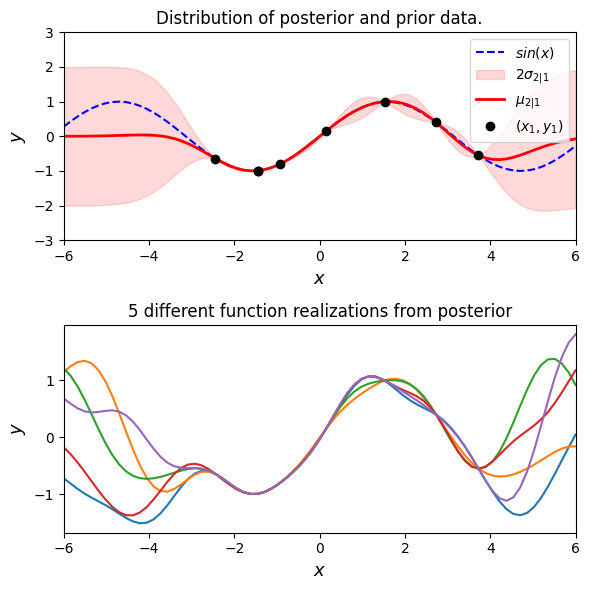

In [25]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()

In [26]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, σ_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    # Kernel of the noisy observations
    Σ11 = kernel_func(X1, X1) + ((σ_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, σ_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    # Kernel of the noisy observations
    Σ11 = kernel_func(X1, X1) + ((σ_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

In [27]:
# Compute the posterior mean and covariance

σ_noise = 1.  # The standard deviation of the noise
# Add noise kernel to the samples we sampled previously
y1 = y1 + ((σ_noise ** 2) * np.random.randn(n1))

# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(X1, y1, X2, exponentiated_quadratic, σ_noise)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

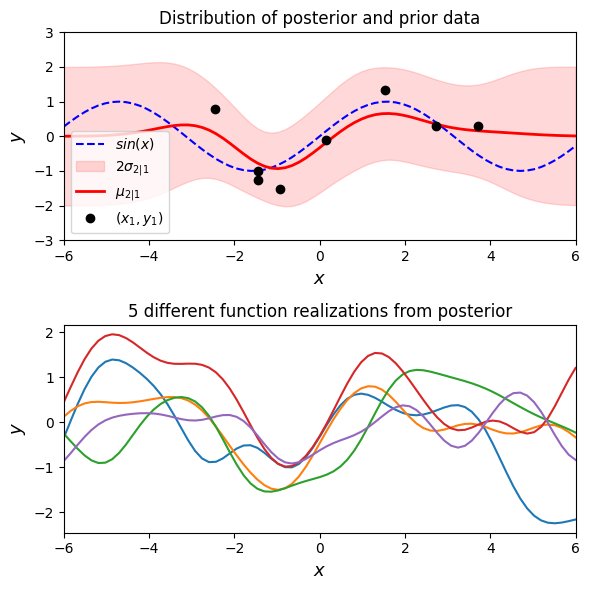

In [28]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, f_sin(X2), 'b--', label='$sin(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2\sigma_{2|1}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()

## Prior & Posterior con diferentes Kernel

[RBF(length_scale=1), RationalQuadratic(alpha=1, length_scale=1), ExpSineSquared(length_scale=1, periodicity=10), DotProduct(sigma_0=1) ** 2, Matern(length_scale=1, nu=1.5)] 



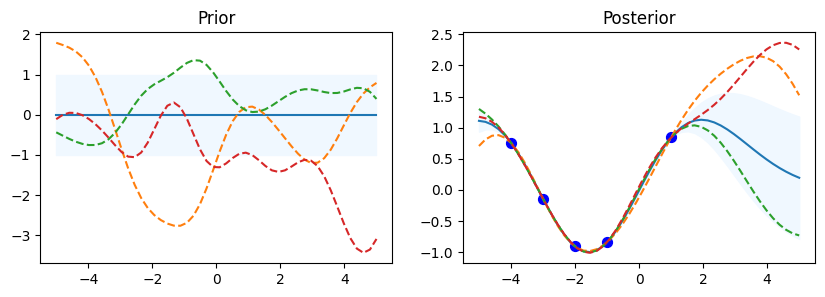

gp.kernel_ RBF(length_scale=1.93)
gp.log_marginal_likelihood: -3.4449378334621152
-------------------------------------------------- 




 C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning:The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


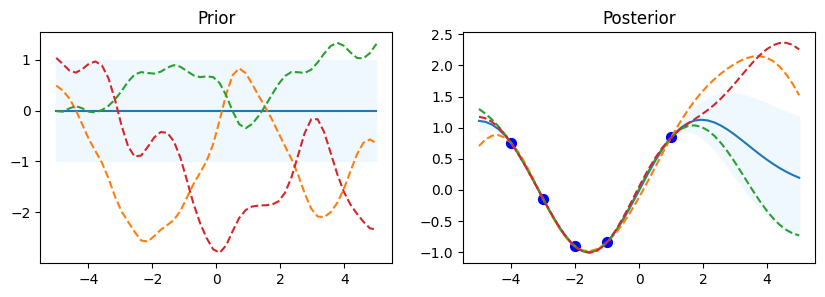

gp.kernel_ RationalQuadratic(alpha=1e+05, length_scale=1.93)
gp.log_marginal_likelihood: -3.444971892232065
-------------------------------------------------- 




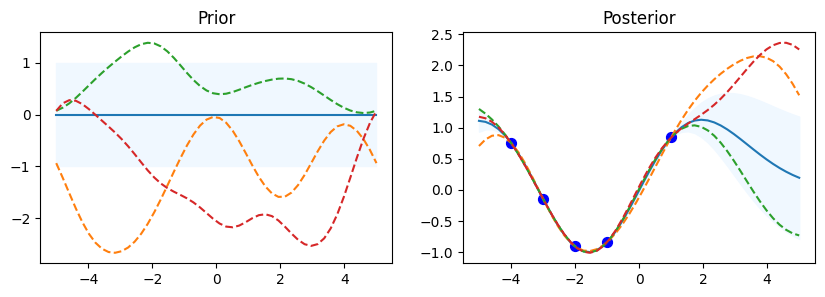

gp.kernel_ ExpSineSquared(length_scale=0.000524, periodicity=2.32e+04)
gp.log_marginal_likelihood: -3.4449381449937784
-------------------------------------------------- 




 C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning:lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


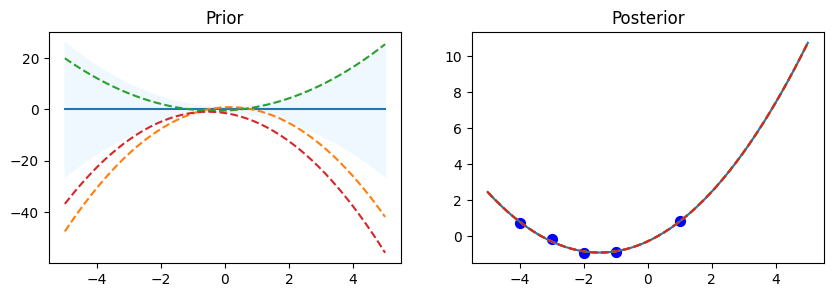

gp.kernel_ DotProduct(sigma_0=1) ** 2
gp.log_marginal_likelihood: -150226366.42035425
-------------------------------------------------- 




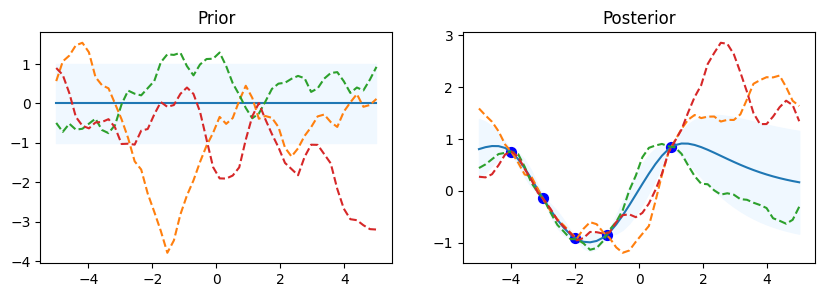

gp.kernel_ Matern(length_scale=1.99, nu=1.5)
gp.log_marginal_likelihood: -5.131637070524745
-------------------------------------------------- 




In [31]:
np.random.seed(0)
n=50
kernel_ =[kernels.RBF (), kernels.RationalQuadratic(), kernels.ExpSineSquared(periodicity=10.0),kernels.DotProduct(sigma_0=1.0)**2,kernels.Matern()]
print(kernel_, '\n')
for kernel in kernel_:

    # Gaussian process
    gp = GaussianProcessRegressor(kernel=kernel)
# Prior
    x_test = np.linspace(-5, 5, n).reshape(-1, 1)
    mu_prior, sd_prior = gp.predict(x_test, return_std=True)
    samples_prior = gp.sample_y(x_test, 3)

# plot

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(x_test, mu_prior)
    plt.fill_between(x_test.ravel(), mu_prior - sd_prior,mu_prior + sd_prior, color='aliceblue')
    plt.plot(x_test, samples_prior, '--')
    plt.title('Prior')

# Fit

    x_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
    y_train = np.sin(x_train)
    gp.fit(x_train, y_train)

#posterior

    mu_post, sd_post = gp.predict(x_test, return_std=True)
    mu_post = mu_post.reshape(-1)
    samples_post = np.squeeze(gp.sample_y(x_test, 3))

# plot

    plt.subplot(1, 2, 2)
    plt.plot(x_test, mu_post)
    plt.fill_between(x_test.ravel(), mu_post - sd_post,mu_post + sd_post, color='aliceblue')
    plt.plot(x_test, samples_post, '--')
    plt.scatter(x_train, y_train, c='blue', s=50)
    plt.title('Posterior')

    plt.show()

    print("gp.kernel_", gp.kernel_)
    print("gp.log_marginal_likelihood:",
    gp.log_marginal_likelihood(gp.kernel_.theta))

    print('-'*50, '\n\n')

### RBF & Linear

In [50]:
def cov_linear(x,x2=None,theta=1):
        if x2 is None:
            return np.dot(x, x.T)*theta
        else:
            return np.dot(x, x2.T)*theta
    
        
def cov_RBF(x, x2=None, theta=np.array([1,1])):        
        """
        Compute the Euclidean distance between each row of X and X2, or between
        each pair of rows of X if X2 is None and feed it to the kernel.
        """
        variance = theta[0]
        lengthscale = theta[1]
        if x2 is None:
            xsq = np.sum(np.square(x),1)
            r2 = -2.*np.dot(x,x.T) + (xsq[:,None] + xsq[None,:])
            r = np.sqrt(r2)/lengthscale
        else:
            x1sq = np.sum(np.square(x),1)
            x2sq = np.sum(np.square(x2),1)
            r2 = -2.*np.dot(x, x2.T) + x1sq[:,None] + x2sq[None,:]
            r = np.sqrt(r2)/lengthscale

        return variance * np.exp(-0.5 * r**2)

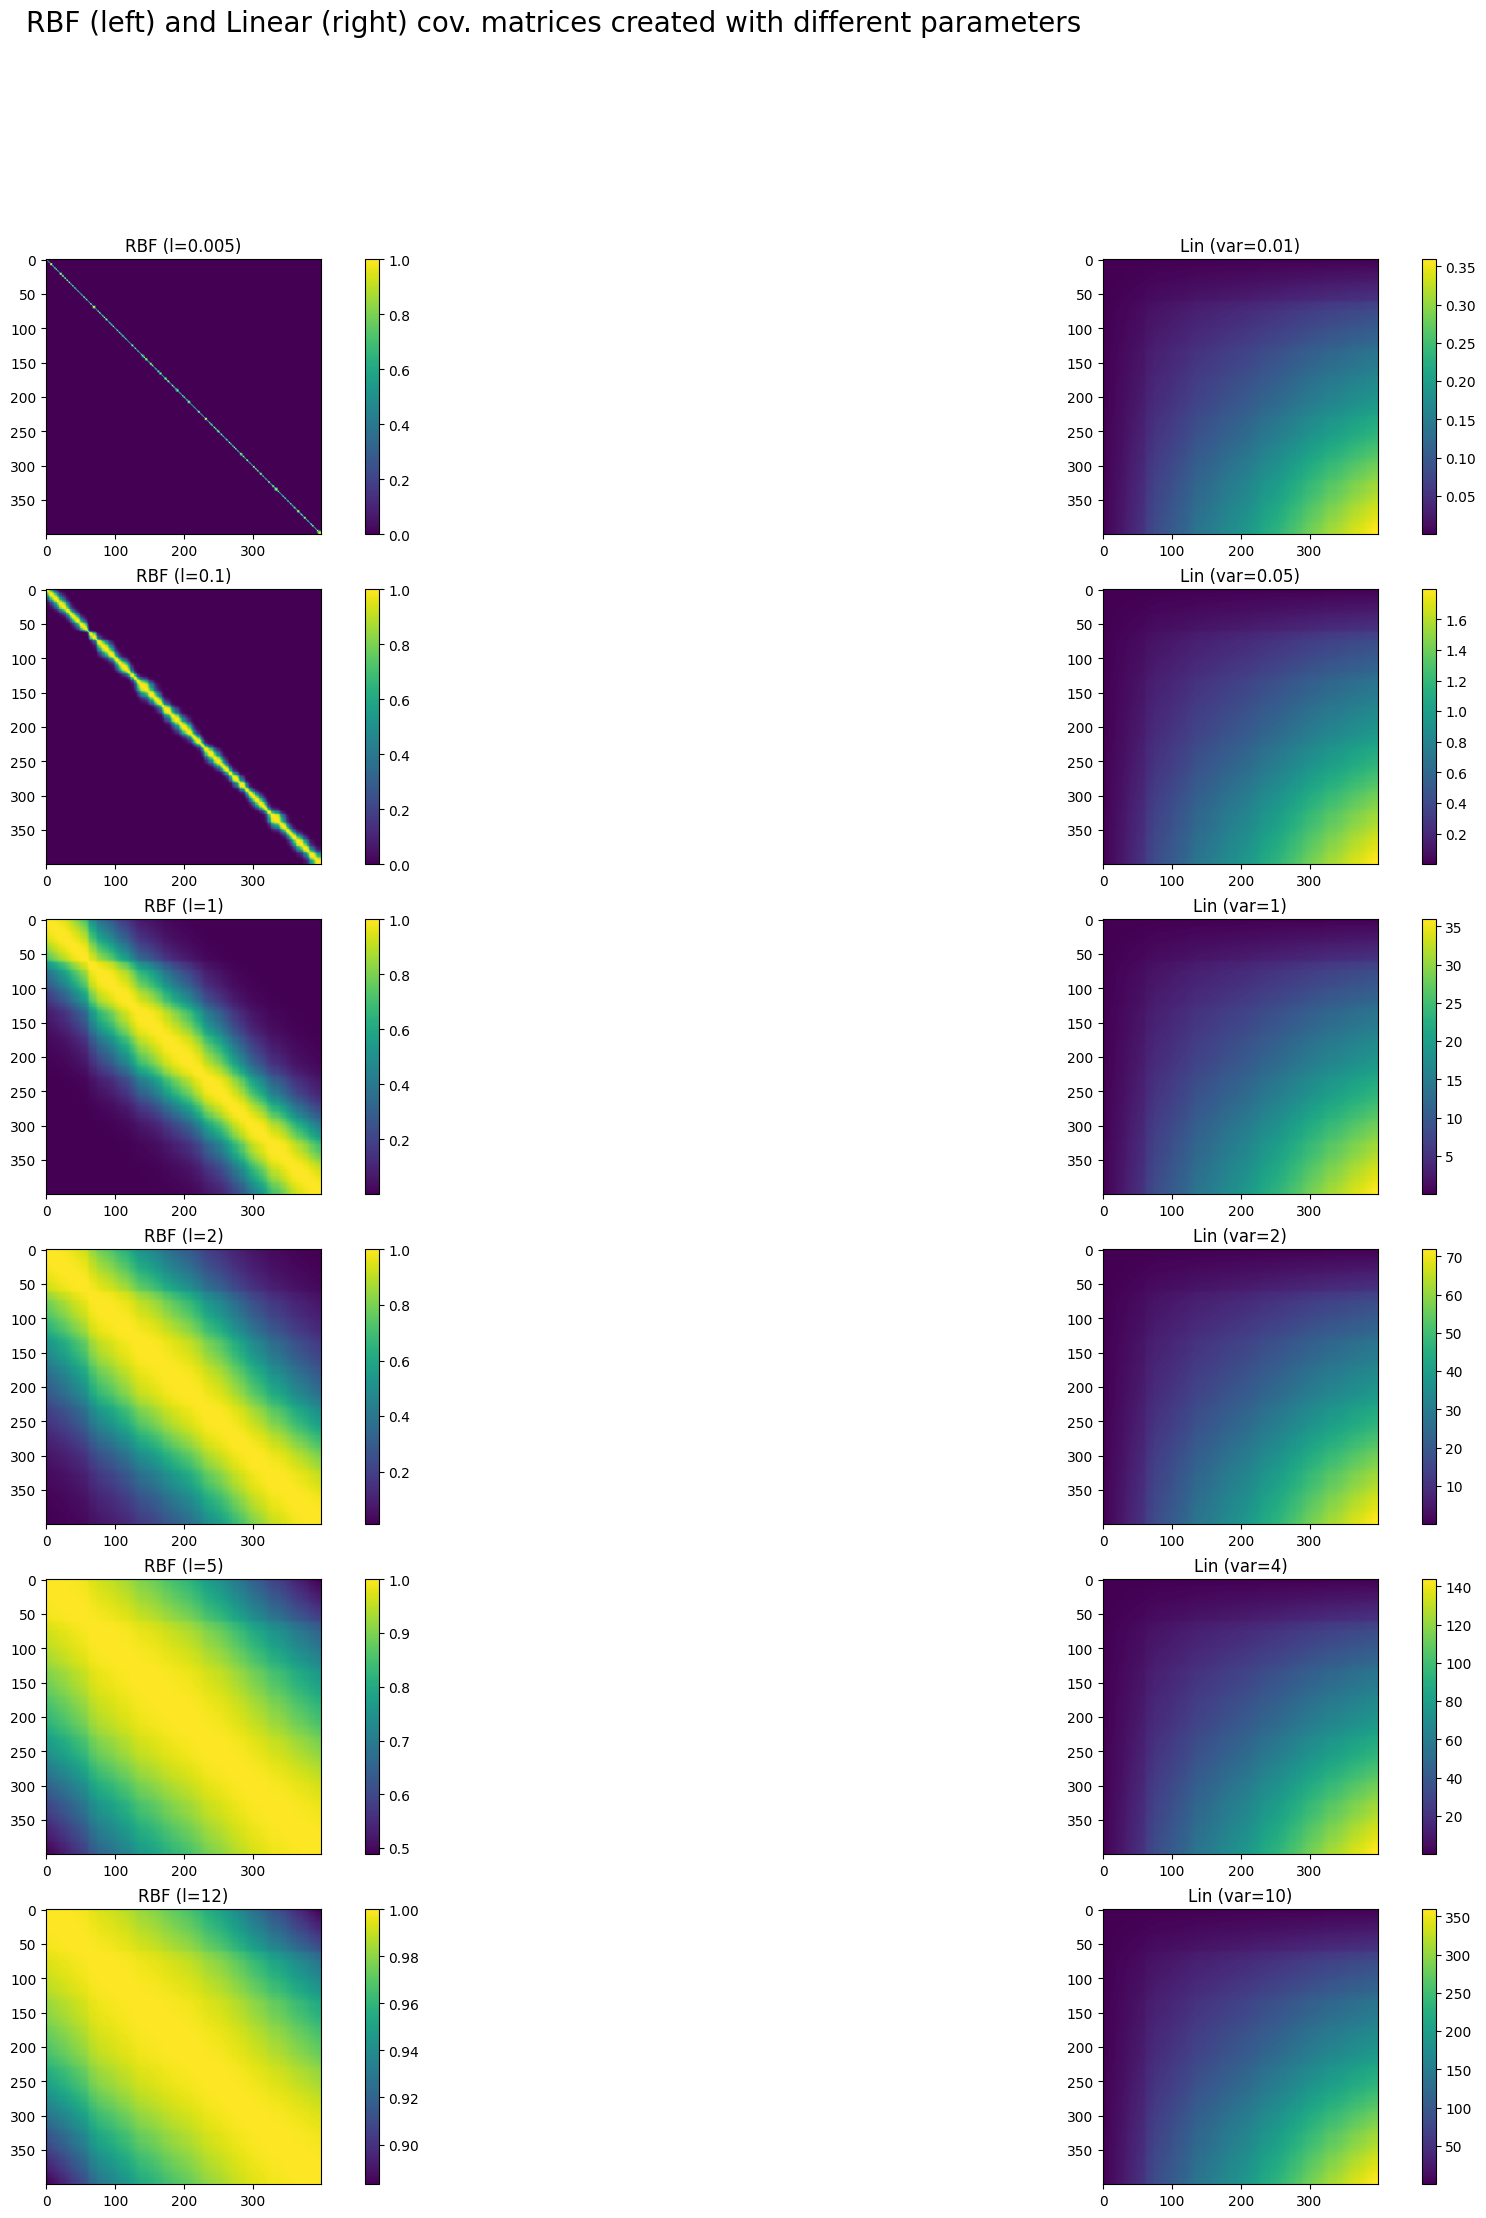

In [108]:
X = np.sort(np.random.rand(400, 1) * 6 , axis=0)

params_linear = [0.01, 0.05, 1, 2, 4, 10]
params_rbf    = [0.005, 0.1, 1, 2, 5, 12]
K = len(params_linear)

plt.figure(figsize=(25,25))
j=1
for i in range(K):
    plt.subplot(K,2,j)
    K_rbf = cov_RBF(X,X,theta=np.array([1,params_rbf[i]]))
    plt.imshow(K_rbf)
    plt.colorbar()
    plt.gca().set_title('RBF (l=' + str(params_rbf[i]) + ')')
    
    plt.subplot(K,2,j+1)
    K_lin = cov_linear(X,X,theta=params_linear[i])
    plt.imshow(K_lin)
    plt.colorbar()
    plt.gca().set_title('Lin (var=' + str(params_linear[i]) + ')')
    
    j+=2
    
plt.suptitle('RBF (left) and Linear (right) cov. matrices created with different parameters', fontsize=14);

### Creando las funciones de la matriz de covarianza

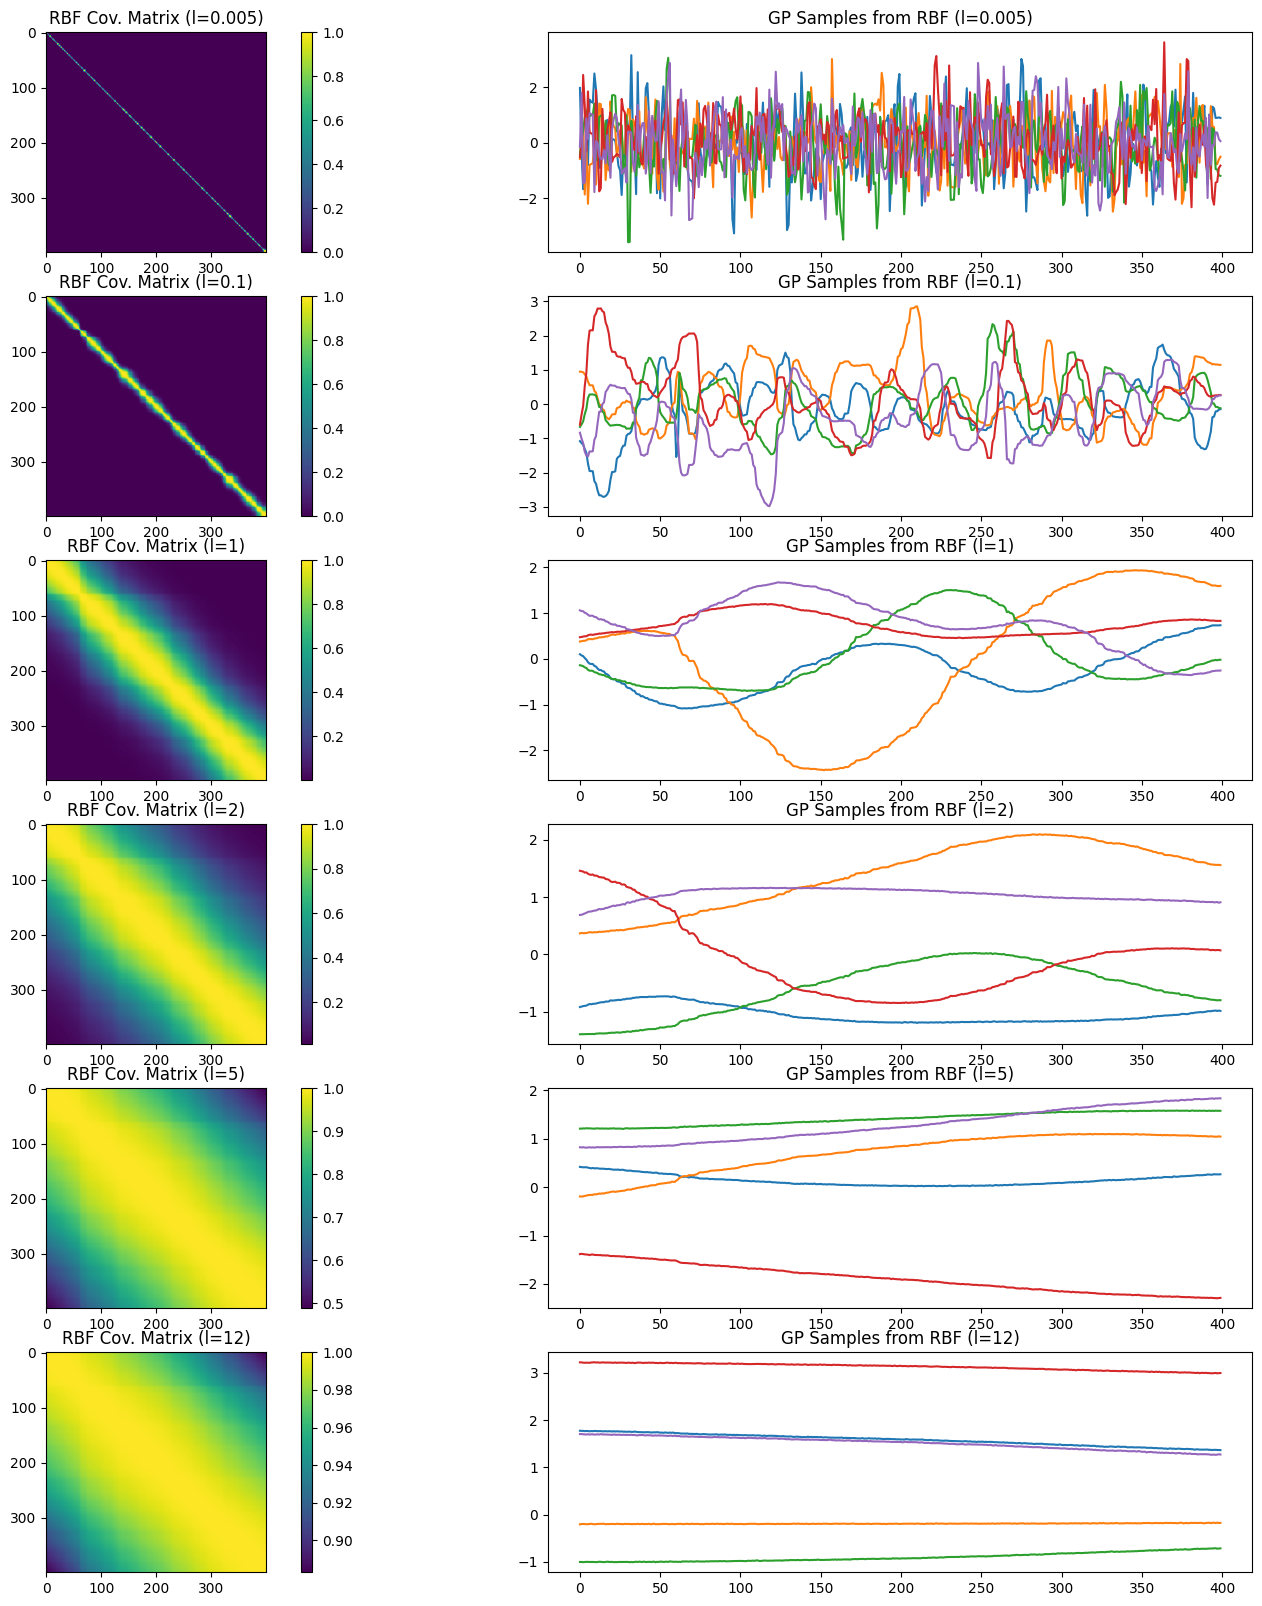

In [109]:
plt.figure(figsize=(20,20))
num_samples=5
j=1
for i in range(K):
    plt.subplot(K,2,j)
    K_rbf = cov_RBF(X,X,theta=np.array([1,params_rbf[i]]))
    plt.imshow(K_rbf)
    plt.colorbar()
    plt.gca().set_title('RBF Cov. Matrix (l=' + str(params_rbf[i]) + ')')
    
    plt.subplot(K,2,j+1)
    # Assume a GP with zero mean
    mu=np.zeros((1,K_rbf.shape[0]))[0,:]
    for s in range(num_samples):
        # Jitter is a small noise addition to the diagonal to ensure positive definiteness
        jitter = 1e-5*np.eye(K_rbf.shape[0])
        sample = np.random.multivariate_normal(mean=mu, cov=K_rbf+jitter)
        plt.plot(sample)
    plt.gca().set_title('GP Samples from RBF (l=' + str(params_rbf[i]) + ')')
    j+=2

Text(0.5, 0.98, 'Cov. function form (left) and Sample cov. matrix (right)')

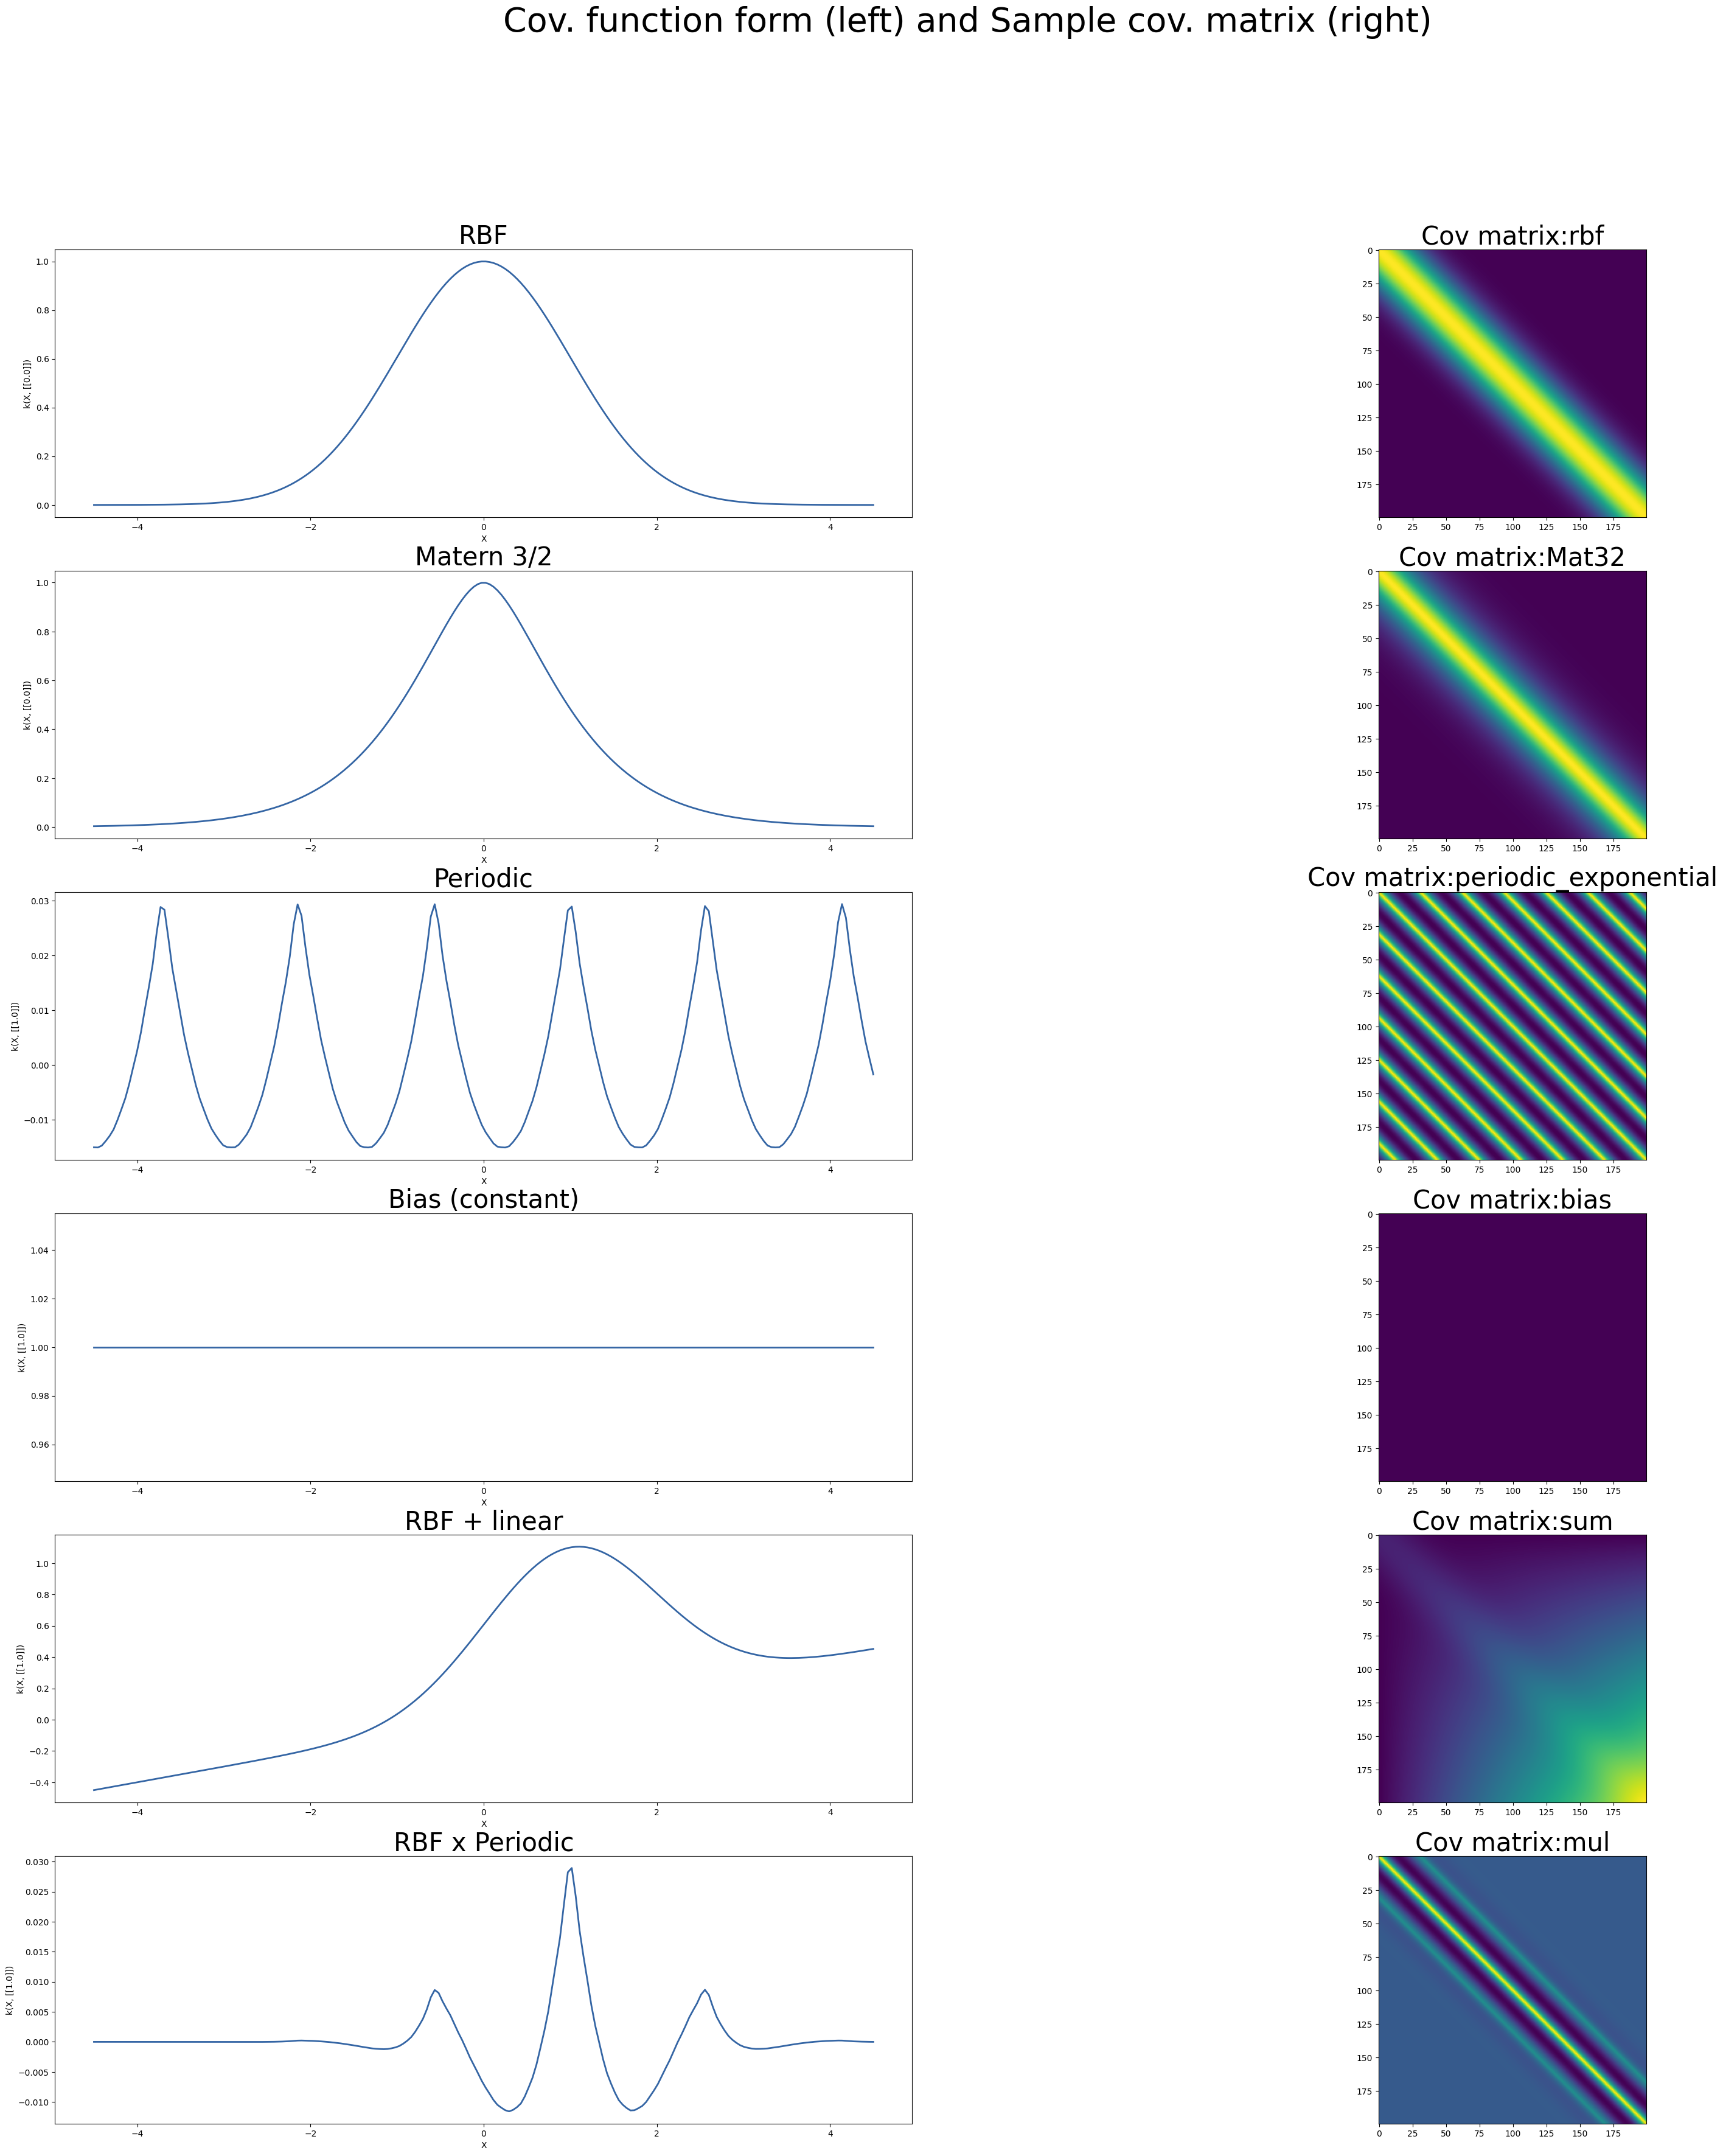

In [59]:
Q=1
x_tmp = np.linspace(0,10,200)[:,None]

plt.figure(figsize=(40,40))
i=1
plt.subplot(6,2,i); i+=1
kern = GPy.kern.RBF(Q)
kern.plot(ax=plt.gca());  plt.gca().set_title('RBF', fontsize=30); 
plt.subplot(6,2,i); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.subplot(6,2,i); i+=1

kern = GPy.kern.Matern32(Q)
kern.plot(ax=plt.gca()); plt.gca().set_title('Matern 3/2', fontsize=30);
plt.subplot(6,2,i); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.subplot(6,2,i); i+=1

kern = GPy.kern.PeriodicExponential(Q,period=np.pi/2)
kern.plot(ax=plt.gca()); plt.gca().set_title('Periodic', fontsize=30);
plt.subplot(6,2,i); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.subplot(6,2,i); i+=1

kern = GPy.kern.Bias(Q)
kern.plot(ax=plt.gca()); plt.gca().set_title('Bias (constant)', fontsize=30);
plt.subplot(6,2,i); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.subplot(6,2,i); i+=1


# We can even add kernels and get a new one...
kern = GPy.kern.RBF(Q) + GPy.kern.Linear(Q,variances=0.1)
kern.plot(ax=plt.gca()); plt.gca().set_title('RBF + linear', fontsize=30)
plt.subplot(6,2,i); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.subplot(6,2,i); i+=1


# ...or even multiply them!
kern = GPy.kern.RBF(Q) * GPy.kern.PeriodicExponential(Q,period=np.pi/2)
kern.plot(ax=plt.gca()); plt.gca().set_title('RBF x Periodic', fontsize=30)
plt.subplot(6,2,i); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)

plt.suptitle('Cov. function form (left) and Sample cov. matrix (right)', fontsize=40);

## Ejemplo

Hacemos el ejemplo de regresión entre -5 y 5. Los puntos de datos de observació) se generan a partir de una distribución uniforme entre -5 y 5. Esto significa que cualquier valor de punto dentro del intervalo dado [-5, 5] es igualmente probable de ser seleccionado por la distribución uniforme. Las funciones se evaluarán en `n` puntos espaciados uniformemente entre -5 y 5. Hacemos esto para mostrar una función continua para la regresión en nuestra región de interés [-5, 5]. Este es un ejemplo simple para realizar regresión GP. Asume un Prior GP con media cero. El código toma prestado en gran medida de la [lectura de Dr. Nando de Freitas sobre procesos Gaussianos para regresión no lineal](https://youtu.be/4vGiHC35j9s).

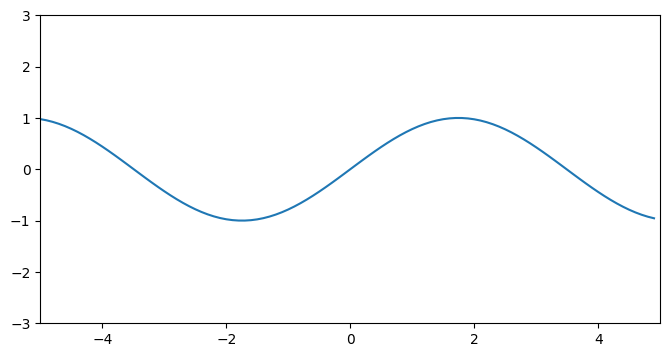

In [14]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)
plt.figure(figsize=(8,4))
plt.plot(x, f(x))
plt.axis([-5, 5, -3, 3])
plt.show()

In [15]:
# Define the kernel
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)



Usamos un **Kernel Exponencial Cuadrado General**, también llamado **Kernel de Función Base Radial** o **Kernel Gaussiano**:

$$
\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp\left(-\frac{1}{2l^2}
  (\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j)\right)
$$

donde $\sigma_f$ y $l$ son hiperparámetros. Más información sobre los hiperparámetros se puede encontrar después de los códigos.

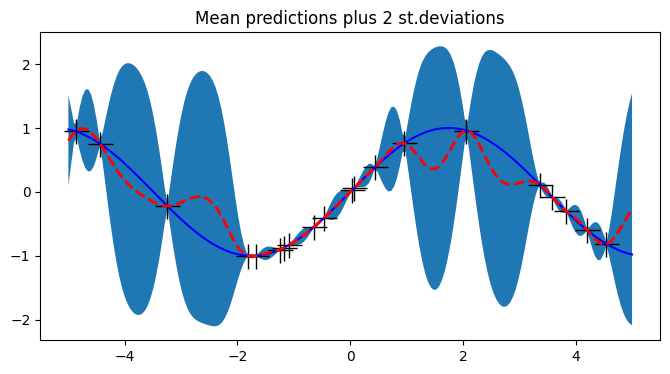

In [16]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
N = 20         # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.00005    # noise variance.

X = np.random.uniform(-5, 5, size=(N,1))     # N training points 
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)

# PLOTS:
plt.figure(figsize=(8,4))
plt.plot(X, y, 'k+', ms=18)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-2*s, mu+2*s)
plt.plot(Xtest, mu, 'r--', lw=2)
plt.title('Mean predictions plus 2 st.deviations')
plt.show()

<Figure size 640x480 with 0 Axes>

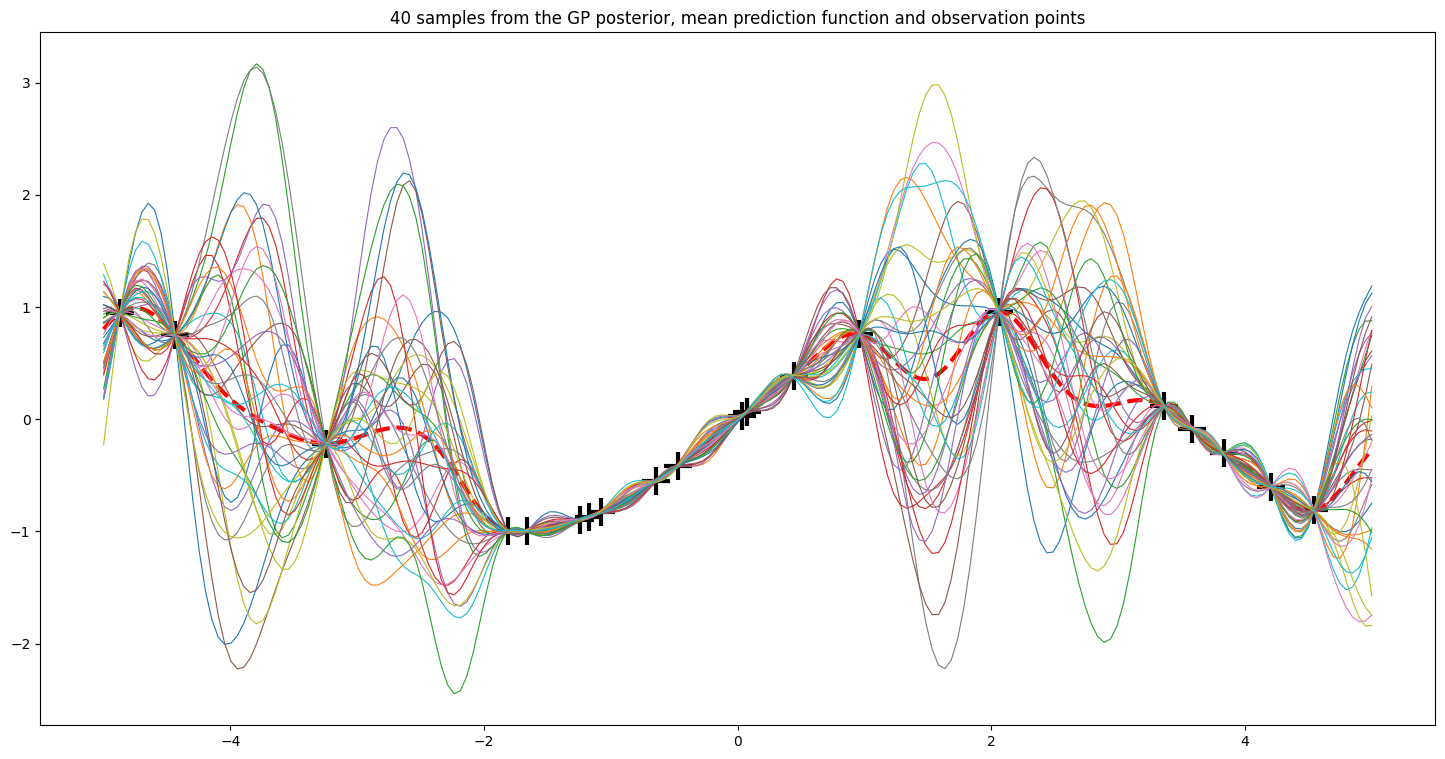

In [17]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,40)))  # size=(n, m), m shown how many posterior  
plt.figure(3)
plt.clf()
plt.figure(figsize=(18,9))
plt.plot(X, y, 'k+', markersize=20, markeredgewidth=3)
plt.plot(Xtest, mu, 'r--', linewidth=3)
plt.plot(Xtest, f_post, linewidth=0.8)
plt.title('40 samples from the GP posterior, mean prediction function and observation points');

Hemos graficado `m=40` muestras del posterior del Proceso Gaussiano junto con la función media para la predicción y los puntos de datos observados (conjunto de datos de entrenamiento). Es evidente que todas las funciones del posterior se colapsan en todos los puntos de observación.

## Ejemplo

In [1]:
#Matriz de covarianza RBF
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [2]:
#Para calcular la probabilidad condicionada
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

In [11]:
#funcion para predecir
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

Iniciamos un proceso Gaussiano con valores de x=0 y=0, con hiperparametros signal=1 y lenghtscale=10

<ErrorbarContainer object of 3 artists>

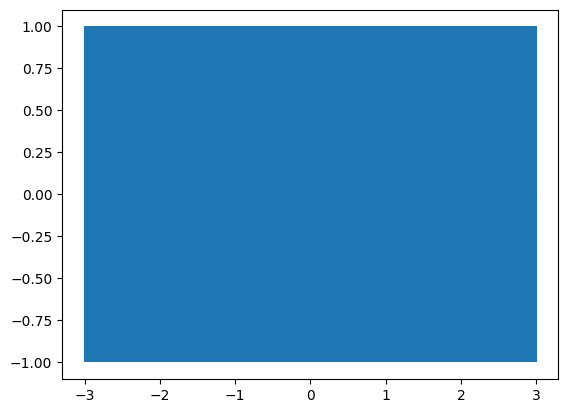

In [20]:
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0);

Incluyamos un nuevo valor de x=1.

In [34]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
print(y)

[1.5421135320004418]


Actualizamos la banda de confianza con este nuevo punto y utilizamos la funcion de covarianza para obtener nuevos puntos.

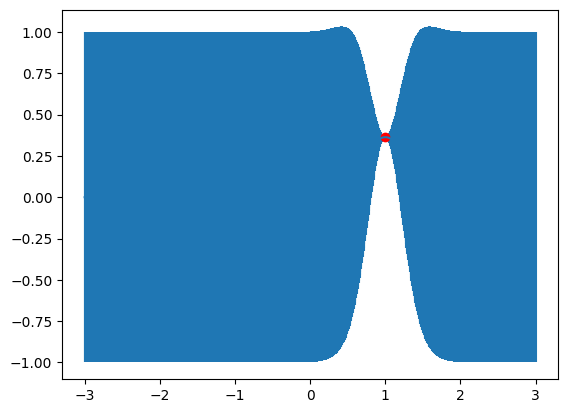

In [22]:
σ_1 = exponential_cov(x, x, θ)
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro");

Utilicemos mas puntos para ver como restringimso nuestra funcion

In [23]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
print(y2)

0.9219180278076656


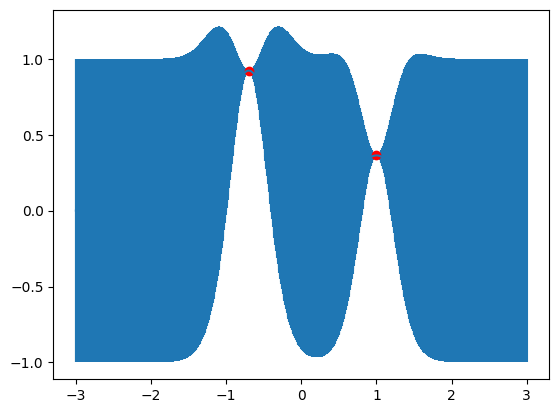

In [24]:
x.append(-0.7)
y.append(y2)
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [31]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
print(y_more)

[ 0.39458039  0.28748377 -1.3083094  -1.00404412  0.35556042]


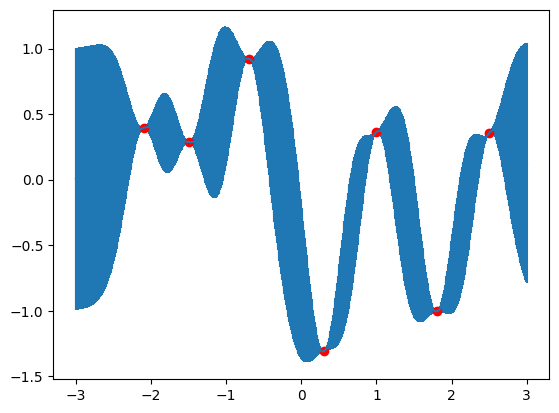

In [32]:
x += x_more
y += y_more.tolist()
σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro");

## Full GP implementación

In [62]:
class CovFunctions(object):
    """
    A wrapper for covariance functions which is compatible with the GP class.
    """
    def __init__(self, covType, theta):
        self.covType = covType
        self.theta = theta
        if covType == 'linear':
            self.compute = self.linear
        elif covType == 'RBF':
            self.compute = self.RBF
    
    def set_theta(self, theta):

        self.theta = theta
    
    def get_theta(self):
        return self.theta
    
    def linear(self, x,x2=None):
        return cov_linear(x,x2,self.theta)
    
    def RBF(self, x, x2=None):
        return cov_RBF(x,x2,self.theta)


class GP(object):
    def __init__(self, X, Y, sigma2, covType, theta):
        self.X = X
        self.Y = Y
        self.N = self.X.shape[0]
        self.sigma2 = sigma2
        self.kern = CovFunctions(covType, theta)
        self.K = self.kern.compute(X)
        # Force computations
        self.update_stats()
    
    def get_params(self):
        return np.hstack((self.sigma2, self.kern.get_theta()))
    
    def set_params(self, params):
        self.sigma2 = params[0]
        self.kern.set_theta(params[1:])
    
    def update_stats(self):
        self.K = self.kern.compute(self.X)
        self.Kinv = np.linalg.inv(self.K+self.sigma2*np.eye(self.N))
        self.logdet = np.log(np.linalg.det(self.K+self.sigma2*np.eye(self.N)))
        self.KinvY = np.dot(self.Kinv, self.Y)
        # Equivalent to: np.trace(np.dot(self.Y, self.KinvY.T))
        self.YKinvY = (self.Y*self.KinvY).sum()
    
    def likelihood(self):
        """ 
        That's actually the logarithm of equation (3)
        Since logarithm is a convex function, maximum likelihood and maximum log likelihood wrt parameters
        would yield the same solutuion, but logarithm is better to manage mathematically and
        numerically.
        """
        return -0.5*(self.N*np.log(2*np.pi) + self.logdet + self.YKinvY)
    
    def posterior(self, x_star):
        """
        Implements equation (4)
        """
        self.update_stats()
        K_starstar = self.kern.compute(x_star, x_star)
        K_star = self.kern.compute(self.X, x_star)
        KinvK_star = np.dot(self.Kinv, K_star)
        mu_pred = np.dot(KinvK_star.T, self.Y)
        K_pred = K_starstar - np.dot(KinvK_star.T, K_star)
        return mu_pred, K_pred
    
    def objective(self,params):
        self.set_params(params)
        self.update_stats()
        return -self.likelihood()
        
def plot_fit(x,y,mu,var):
    """
    Plot the fit of a GP
    """
    plt.plot(x,y, 'k-o',label='true')
    plt.plot(x,mu, 'b-<',label='predicted')
    plt.plot(x, mu+2*np.sqrt(var), 'r--',label='var')
    plt.plot(x, mu-2*np.sqrt(var), 'r--')
    plt.legend()

Crearemos algunos datos de muestra en 1D a partir de un Proceso Gaussiano (GP) con covarianza RBF y una longitud de escala = 0.85. A continuación, normalizamos los datos y reservamos algunos para pruebas. Luego, graficamos los datos.


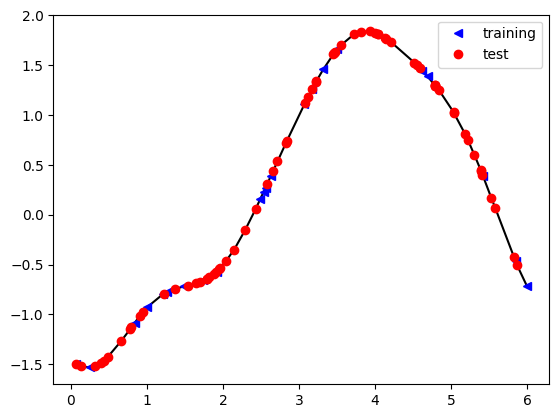

In [61]:
N=22 # number of training points
Nstar = 70 # number of test points

# create toy data
X = np.sort(np.random.rand(N+Nstar, 1) * 6 , axis=0)



K_rbf = cov_RBF(X,X,theta=np.array([1,0.85]))
mu=np.zeros((1,K_rbf.shape[0]))[0,:]
jitter = 1e-5*np.eye(K_rbf.shape[0])
Y = np.random.multivariate_normal(mean=mu, cov=K_rbf+jitter)[:,None]
#Y = np.sin(X*2) + np.random.randn(*X.shape) * 0.008

# split data into training and test set
perm = np.random.permutation(X.shape[0])
Xtr = X[np.sort(perm[0:N],axis=0),:]
Ytr = Y[np.sort(perm[0:N],axis=0),]
X_star = X[np.sort(perm[N:N+Nstar],axis=0),:]
Y_star = Y[np.sort(perm[N:N+Nstar],axis=0),:]

# Normalize data to be 0 mean and 1 std
Ymean = Ytr.mean()
Ystd = Ytr.std()
Ytr-=Ymean
Ytr/=Ystd
Y_star -= Ymean
Y_star /= Ystd

# plot data
plt.plot(X,(Y-Ymean)/Ystd, 'k-')
plt.plot(Xtr,Ytr, 'b<',label='training')
plt.plot(X_star,Y_star, 'ro',label='test')
plt.legend();

Ahora definiremos dos modelos de Proceso Gaussiano (GP), uno con una función de covarianza lineal y otro con una función de covarianza RBF. Los utilizaremos para predecir los datos de entrenamiento y de prueba.


Text(0.5, 1.0, 'RBF, test')

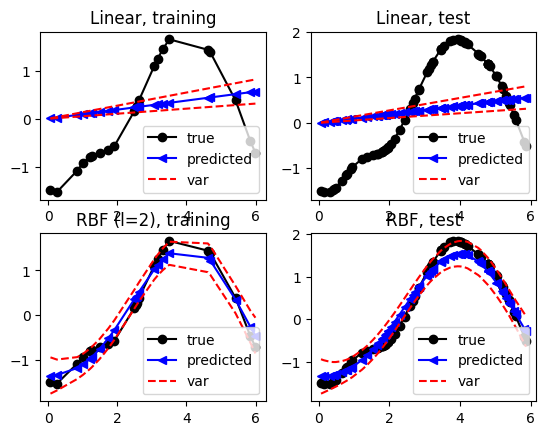

In [64]:
# Define GP models with initial parameters
g_lin = GP(Xtr, Ytr, 0.1, 'linear', 2)
g_rbf = GP(Xtr, Ytr, 0.1, 'RBF', np.array([1,2]))

# Get the posterior of the two GPs on the *training* data
mu_lin_tr,var_lin_tr = g_lin.posterior(Xtr)
mu_rbf_tr,var_rbf_tr = g_rbf.posterior(Xtr)

# Get the posterior of the two GPs on the *test* data
mu_lin_star,var_lin_star = g_lin.posterior(X_star)
mu_rbf_star,var_rbf_star = g_rbf.posterior(X_star)

# Plot the fit of the two GPs on the training and test data
ax=plt.subplot(2, 2, 1); ax.set_aspect('auto')
plot_fit(Xtr, Ytr, mu_lin_tr, np.diag(var_lin_tr)[:,None])
plt.gca().set_title('Linear, training')

ax=plt.subplot(2, 2, 2); ax.set_aspect('auto')
plot_fit(X_star, Y_star, mu_lin_star, np.diag(var_lin_star)[:,None])
plt.gca().set_title('Linear, test')

ax=plt.subplot(2, 2, 3); ax.set_aspect('auto')
plot_fit(Xtr, Ytr, mu_rbf_tr, np.diag(var_rbf_tr)[:,None])
plt.gca().set_title('RBF (l=' +  str(g_rbf.kern.get_theta()[1]) + '), training')

ax=plt.subplot(2, 2, 4); ax.set_aspect('auto')
plot_fit(X_star, Y_star, mu_rbf_star, np.diag(var_rbf_star)[:,None])
plt.gca().set_title('RBF, test');

Recuerda que el valor verdadero que genera los datos es 0.85, pero esperaríamos encontrarlo como el mejor solo si tuviéramos datos infinitos. De lo contrario, también se espera encontrar un valor cercano.

En el siguiente gráfico mostramos el ajuste para cada longitud de escala y la verosimilitud lograda por cada una.


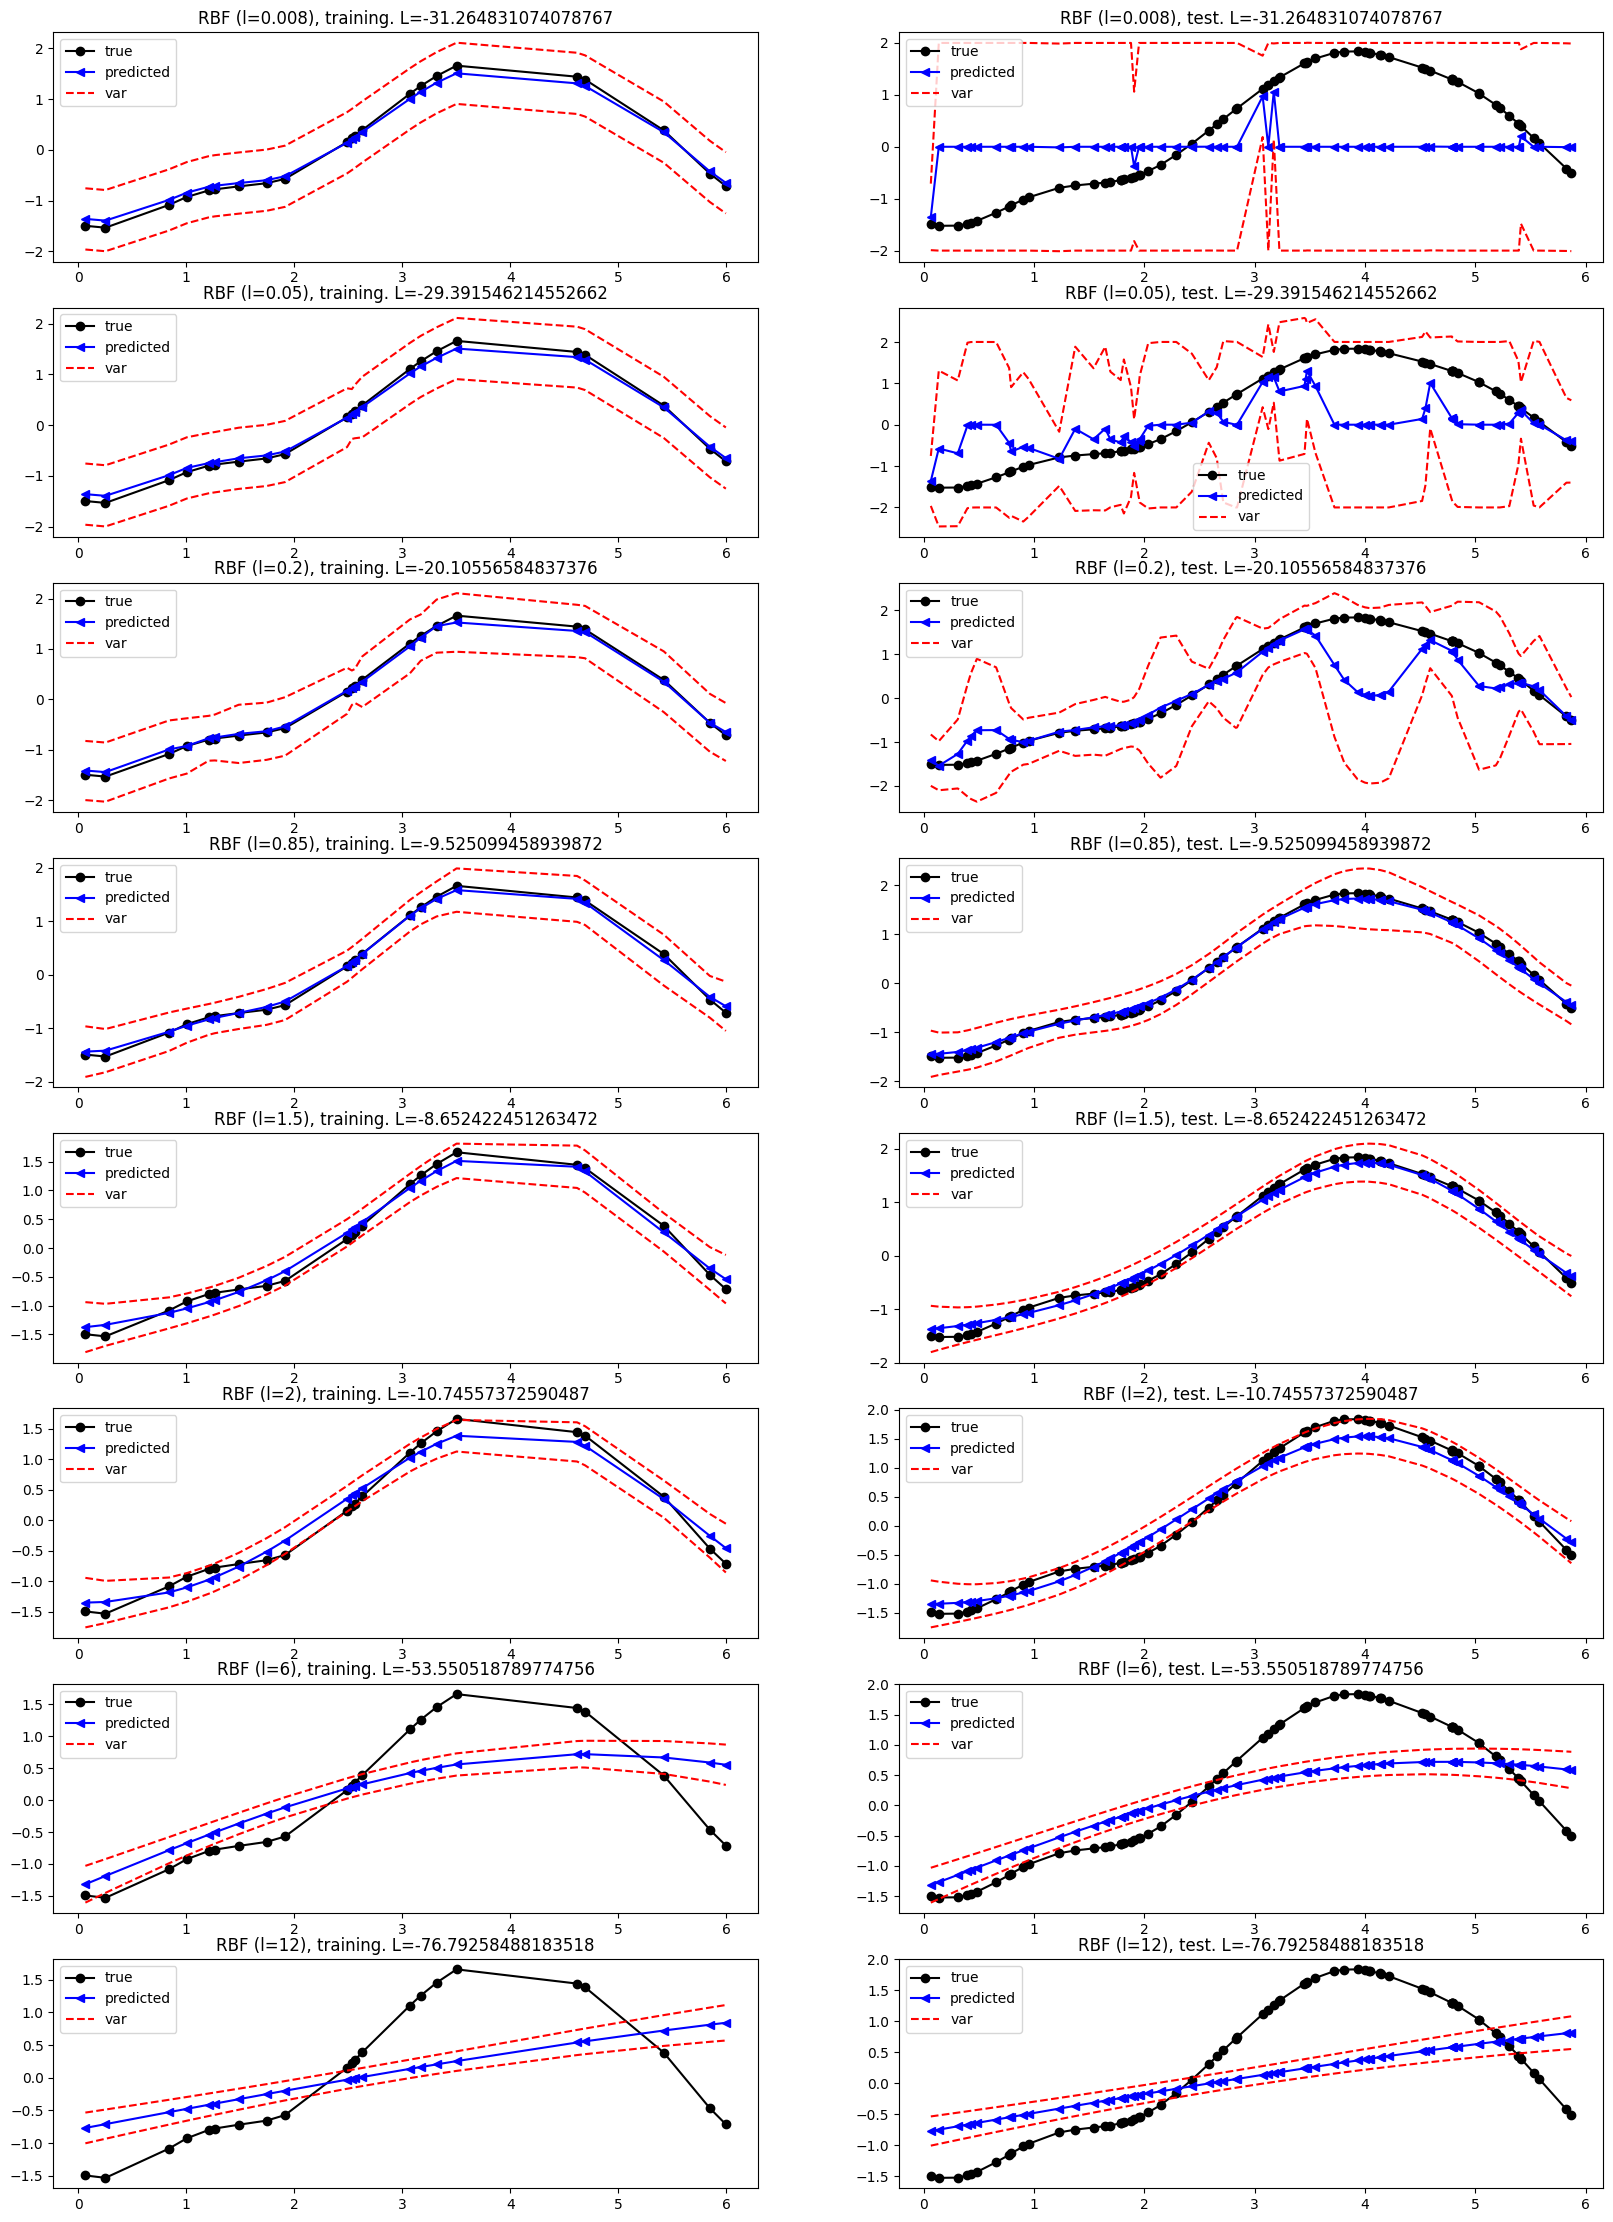

In [69]:
f=figure(figsize=(20,28)) 
i = 1
# Following array holds different lengthscales to test one by one
test_l=[0.008, 0.05, 0.2, 0.85, 1.5, 2, 6, 12]
for l in test_l:
    g_rbf = GP(Xtr, Ytr, 0.1, 'RBF', np.array([1,l]))
    mu_rbf_tr,var_rbf_tr = g_rbf.posterior(Xtr)
    mu_rbf_star,var_rbf_star = g_rbf.posterior(X_star)

    ax=plt.subplot(len(test_l), 2,i); ax.set_aspect('auto')
    plot_fit(Xtr, Ytr, mu_rbf_tr, np.diag(var_rbf_tr)[:,None])
    ll = g_rbf.likelihood()
    plt.gca().set_title('RBF (l=' +  str(g_rbf.kern.get_theta()[1]) + '), training. L=' + str(ll) )

    ax=plt.subplot(len(test_l), 2, i+1); ax.set_aspect('auto')
    plot_fit(X_star, Y_star, mu_rbf_star, np.diag(var_rbf_star)[:,None])
    ll = g_rbf.likelihood()
    plt.gca().set_title('RBF (l=' +  str(g_rbf.kern.get_theta()[1]) + '), test. L=' + str(ll) )
    i+=2;

Vemos que las longitudes de escala muy cortas generan funciones más "onduladas", que son capaces de interpolar perfectamente entre los puntos de entrenamiento. Sin embargo, un modelo sobreajustado de este tipo tiende a estar más "sorprendido" por cualquier cosa que no sea exactamente los mismos datos de entrenamiento... por lo tanto, tiene un mal desempeño en el conjunto de prueba.

Por otro lado, las longitudes de escala grandes generan funciones muy planas, que en el límite se parecen a una función lineal y subajustan los datos.

Entonces, ¿cómo encontramos automáticamente la longitud de escala correcta?

El enfoque más adecuado para seleccionar el parámetro correcto no es una verificación visual ni probar el error en los datos de entrenamiento/conjunto de validación. En cambio, queremos observar la verosimilitud, que nos indica cuál es la probabilidad de que el modelo específico (con longitud de escala l) haya generado los datos.

Para mostrar esto, probaremos nuevamente diferentes configuraciones para la longitud de escala del GP-RBF, pero esta vez haremos un seguimiento de la verosimilitud y también del error de entrenamiento/prueba.

Primero, crea algunas funciones auxiliares:


In [70]:
# Root mean squared error
def rmse(pred, truth):
    pred = pred.flatten()
    truth = truth.flatten()
    return np.sqrt(np.mean((pred-truth)**2))

# Make data 0 mean and 1 std.
def standardize(x):
    return (x-x.mean())/x.std()

In [71]:
test_l=np.linspace(0.01,5, 100)
ll = []
err_tr = []
err_test = []
for l in test_l:
    g_rbf = GP(Xtr, Ytr, 0.1, 'RBF', np.array([1,l]))
    g_rbf.update_stats()
    ll.append(g_rbf.likelihood())
    mu_rbf_tr,var_rbf_tr = g_rbf.posterior(Xtr)
    err_tr.append(rmse(mu_rbf_tr, Ytr))
    mu_rbf_star,var_rbf_star = g_rbf.posterior(X_star)
    err_test.append(rmse(mu_rbf_star, Y_star))
ll = standardize(np.array(ll))
err_tr = standardize(np.array(err_tr))
err_test = standardize(np.array(err_test))

Best lengthscale according to likelihood 1.2701010101010102
Best lengthscale according to training error: 0.614848484848485
Best lengthscale according to test error    : 0.8164646464646466


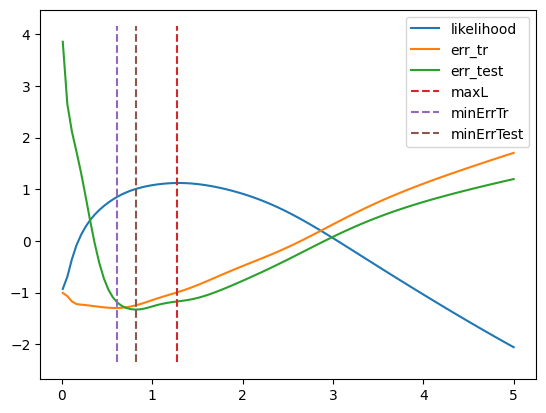

In [81]:
max_ll, argmax_ll = np.max(ll), np.argmax(ll)
min_err_tr, argmin_err_tr = np.min(err_tr), np.argmin(err_tr)
min_err_test, argmin_err_test = np.min(err_test), np.argmin(err_test)

plt.plot(test_l, ll,label='likelihood')
plt.plot(test_l, err_tr,label='err_tr')
plt.plot(test_l, err_test,label='err_test')
tmp_x = np.ones(test_l.shape[0])
ylim=plt.gca().get_ylim()
tmp_y = np.linspace(ylim[0],ylim[1], tmp_x.shape[0])
plt.plot(tmp_x*test_l[argmax_ll], tmp_y,'--', label='maxL')
plt.plot(tmp_x*test_l[argmin_err_tr], tmp_y,'--', label='minErrTr')
plt.plot(tmp_x*test_l[argmin_err_test], tmp_y,'--', label='minErrTest')

plt.legend()
print(f"Best lengthscale according to likelihood {str(test_l[argmax_ll])}")
print(f"Best lengthscale according to training error: {str(test_l[argmin_err_tr])}")
print(f"Best lengthscale according to test error    : {str(test_l[argmin_err_test])}")

El hecho de que la mejor longitud de escala (según la verosimilitud) no sea necesariamente la que nos da el menor error de entrenamiento es una buena propiedad, es decir, el modelo evita el sobreajuste.

La longitud de escala elegida también está bastante cerca de la longitud verdadera. Realizar el experimento con más datos revelará una coincidencia aún más cercana (ten en cuenta que los problemas numéricos debido a la codificación simple aquí podrían causar problemas en los cálculos).

Para optimizar correctamente el kernel, queremos evitar una búsqueda exhaustiva del parámetro correcto, especialmente dado que también hay otros parámetros que antes consideramos fijos.

La forma de optimizar el Proceso Gaussiano (GP) según la máxima verosimilitud es utilizando la información del gradiente. Luego, al proporcionar las funciones de los gradientes y la función del objetivo (ya implementada en GP.objective) a un optimizador de gradiente, obtendrás automáticamente el resultado. Consulta la función *optimize* de SciPy.

Para ahorrar algo de tiempo y esfuerzo, demostraremos la optimización con GPy [http://github.com/SheffieldML/GPy], un paquete de software de GP escrito en Python.

In [82]:
Q = Xtr.shape[1]
k = GPy.kern.RBF(Q)
m = GPy.models.GPRegression(X=Xtr, Y=Ytr, kernel=k)

initializing Y

initializing inference method

adding kernel and likelihood as parameters


Name : GP regression
Objective : 26.657279240475685
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x242ee6d4a10>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x242ee721410>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x242edccd390>]}

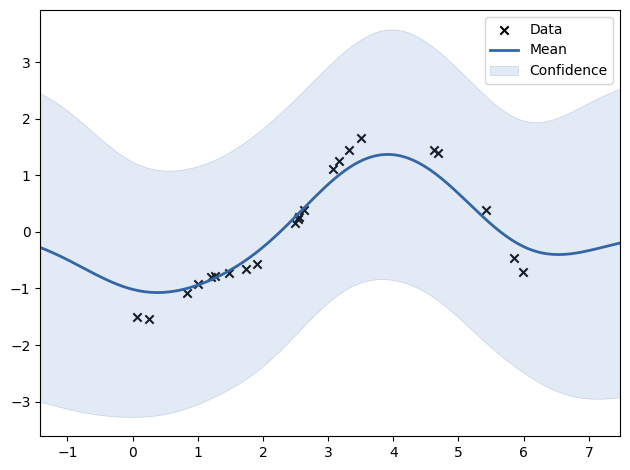

In [83]:
print (m)
m.plot()

Optimiza utilizando el método del gradiente. Observa cómo la longitud de escala optimizada está cerca de la que encontramos antes mediante búsqueda en rejilla y aún más cerca de la verdadera.


In [84]:
m.optimize(messages=1)


Name : GP regression
Objective : -39.139528859042656
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     0.8908914782258418  |      +ve      |        
  rbf.lengthscale          |     0.8413414090957965  |      +ve      |        
  Gaussian_noise.variance  |  4.779814386919044e-06  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x242ee793b10>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x242edcc3290>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x242ee72dc10>]}

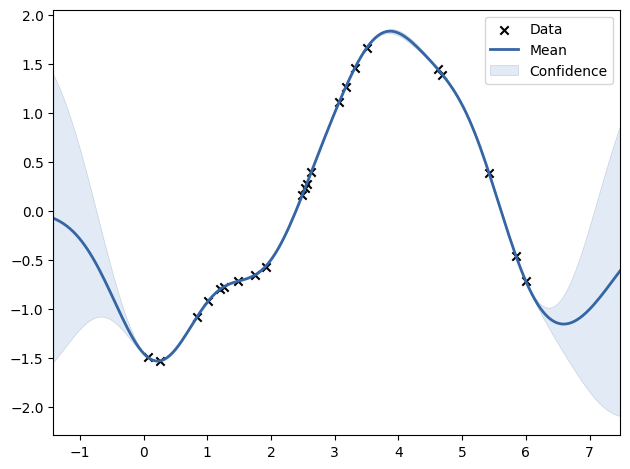

In [86]:
print(m)
m.plot()

Predecir nuevos datos

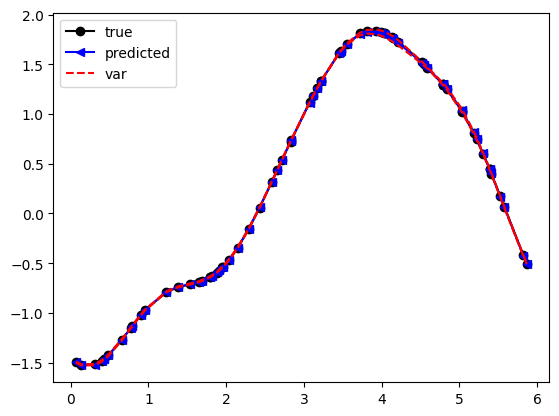

In [87]:
mu,var = m.predict(X_star)
plot_fit(X_star, Y_star, mu, var)

## Packages-

Hay varios paquetes o marcos disponibles para realizar Regresión de Procesos Gaussianos (GPR). 

Uno ligero es [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/gaussian_process.html), cuya implementación simple, como el ejemplo anterior, se puede realizar rápidamente. Solo sirve para obtener una comprensión básica de la implementación de GP después del ejemplo de implementación simple anterior. Es demasiado vago para comprender el propósito teórico de GP.

La GPR es computacionalmente costosa en espacios de alta dimensión (con más de unas pocas docenas de características) debido al hecho de que utiliza todas las muestras/características para hacer las predicciones. Cuantas más observaciones, más cálculos se necesitan para las predicciones. Se prefiere un paquete que incluya implementaciones de algoritmos de última generación para una implementación eficiente de tareas complejas de GPR.

Uno de los marcos de GP más conocidos es [GPy](https://sheffieldml.github.io/GPy/). GPy se ha desarrollado de manera bastante madura con explicaciones bien documentadas. GPy utiliza NumPy para realizar todos sus cálculos. Para tareas que no requieren cálculos intensivos y algoritmos muy actualizados, GPy es suficiente y más estable.

Para tareas de GPR que requieren mayores cálculos, la aceleración por GPU es especialmente preferida. [GPflow](https://www.gpflow.org/) se origina en GPy, y gran parte de la interfaz es similar. GPflow aprovecha **TensorFlow** como su backend computacional. Más diferencias técnicas entre los marcos GPy y GPflow se pueden encontrar [aquí](https://gpflow.readthedocs.io/en/master/intro.html#what-s-the-difference-between-gpy-and-gpflow).

[GPyTorch](https://gpytorch.ai/) es otro marco que proporciona aceleración por GPU a través de **PyTorch**. Contiene algoritmos de GP muy actualizados. Al igual que GPflow, GPyTorch proporciona gradientes automáticos. Por lo tanto, modelos complejos, como incrustar redes neuronales profundas en modelos GP, pueden desarrollarse más fácilmente.

Después de revisar rápidamente la documentación e implementar tutoriales básicos de GPR de [GPyTorch](https://github.com/jwangjie/gpytorch/blob/master/examples/01_Exact_GPs/Simple_GP_Regression.ipynb) y [GPflow](https://github.com/jwangjie/gpytorch/blob/master/examples/01_Exact_GPs/Simple_GP_Regression_GPflow.ipynb), mi impresión es que el uso de GPyTorch es más automático y GPflow tiene más controles. La impresión también puede provenir de la experiencia de uso con TensorFlow y PyTorch.

## Ejemplo

In [ ]:
# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(80)

# Define the kernel (RBF kernel)
kernel = 1.0 * RBF(length_scale=1.0)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.5, random_state=0)

# Fit the Gaussian Process model to the training data
gp.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Visualize the results
x = np.linspace(0, 5, 1000)[:, np.newaxis]
y_mean, y_cov = gp.predict(x, return_cov=True)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(x, y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(x[:, 0], y_mean - 1.96 * np.sqrt(np.diag(y_cov)), y_mean + 1.96 *
				np.sqrt(np.diag(y_cov)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Ejemplo

In [1]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

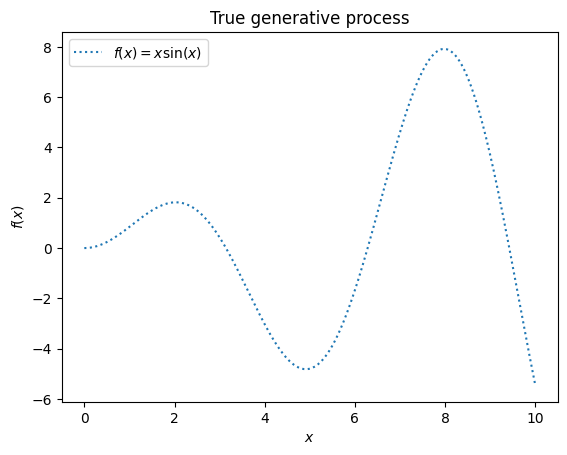

In [2]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

### Example with noise-free target¶

In [3]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

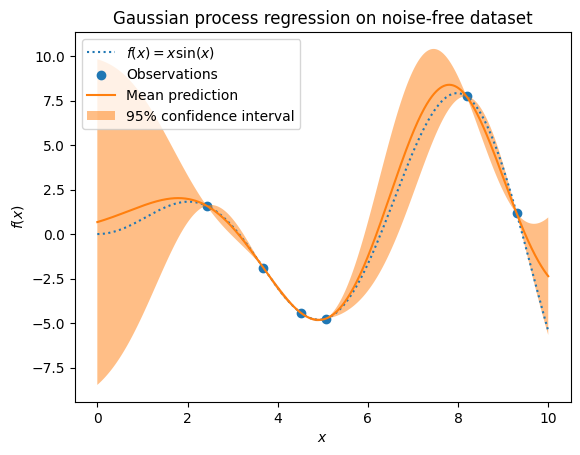

In [5]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

### Example with noisy targets¶


In [7]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [8]:
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

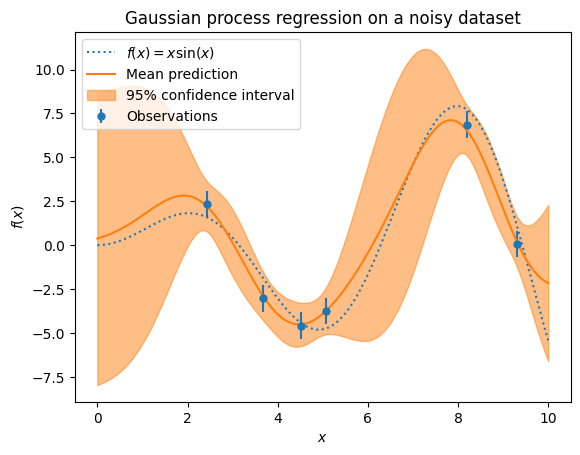

In [9]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

### Ejemplo de [Piero Paialunga](https://towardsdatascience.com/using-gaussian-process-regression-as-a-generative-model-using-python-66278a154eb5)

In [12]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [2]:
 def generate_train_data(temp_number=100,point_number =100,noise_value = 5):
    n_t = temp_number
    points_per_t = point_number
    X = np.linspace(0,10*np.pi,points_per_t).reshape(-1,1)
    Y = []
    T = np.linspace(100,200,n_t).reshape(-1,1).astype('float')
    for i in range(n_t):
        noise = np.random.normal(0,noise_value,points_per_t).reshape(-1,1)
        y = T[i]*np.sin(X)+noise
        Y.append(y)
    Y.append(X)
    Y = np.array(Y)
    Y = Y[:,:,0]
    Y = Y.T
    data_df = pd.DataFrame(Y)
    data_df= data_df.rename(columns={n_t:'x'})
    no_x_df = data_df.drop('x',axis=1)
    Y = no_x_df.T.values
    data = (T,Y)
    result = {'Data':data,'Dataframe':no_x_df}
    return result

In [3]:
def generate_test_data(data,noise_value=5):
    data_input = data['Data']
    T, X = data_input
    points_per_t = len(X[1])
    X = np.linspace(0,10*np.pi,points_per_t).reshape(-1,1)
    T_test = []
    for i in range(len(T)-1):
        t_i= T[i]
        t_new_i = T[i+1]
        T_test.append((t_i[0]+t_new_i[0])/2.)
    T_test.append(T[i+1][0])
    num_test = int(len(T)*0.2)
    T_test = random.sample(T_test,num_test)
    Y_test = []
    for t in T_test:
        noise = np.random.normal(0,noise_value,points_per_t).reshape(-1,1)
        Y_test.append(t*np.sin(X)+noise)
    Y_test = np.array(Y_test)
    Y_test = Y_test[:,:,0]
    result = [T_test,Y_test]
    return result

Text(0, 0.5, '$y$')

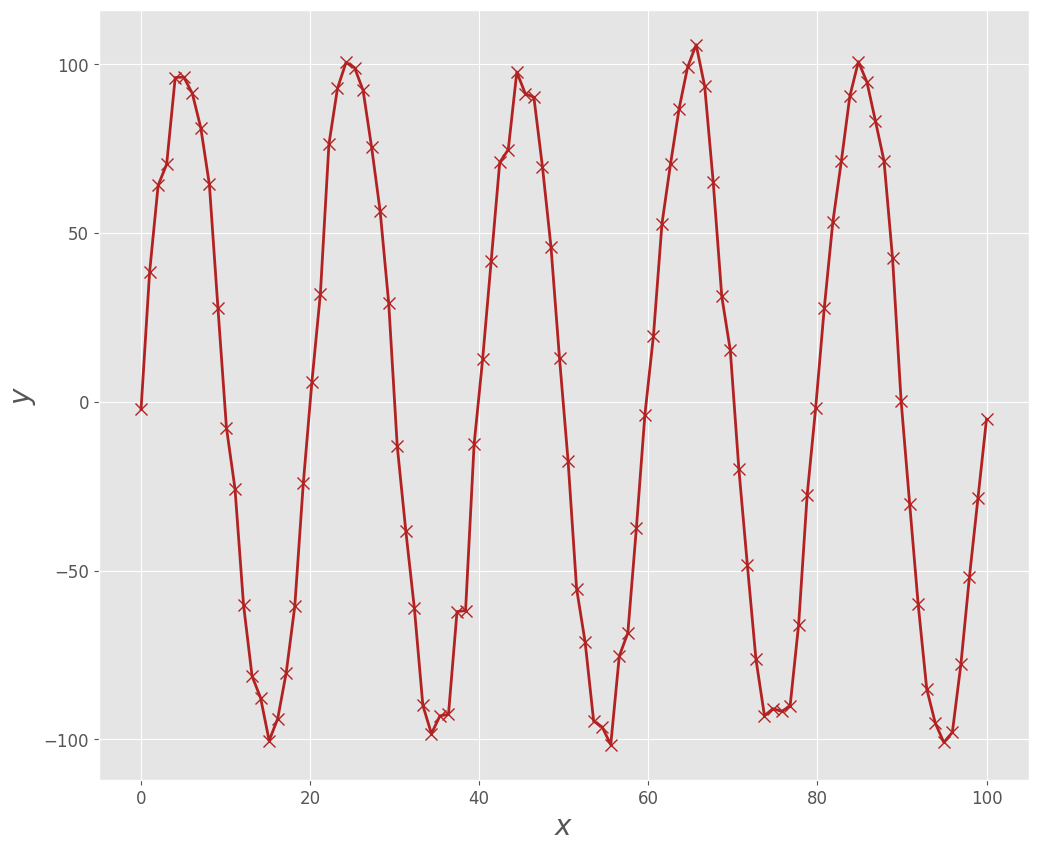

In [13]:
prova = generate_train_data(point_number = 100)['Data'][1][0]
xtest = np.linspace(0,len(prova),len(prova))
ytest = generate_train_data()['Data'][1][0]

plt.plot(xtest,ytest,color='firebrick',label='Ground Truth',marker='x')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$y$',fontsize=20);

C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


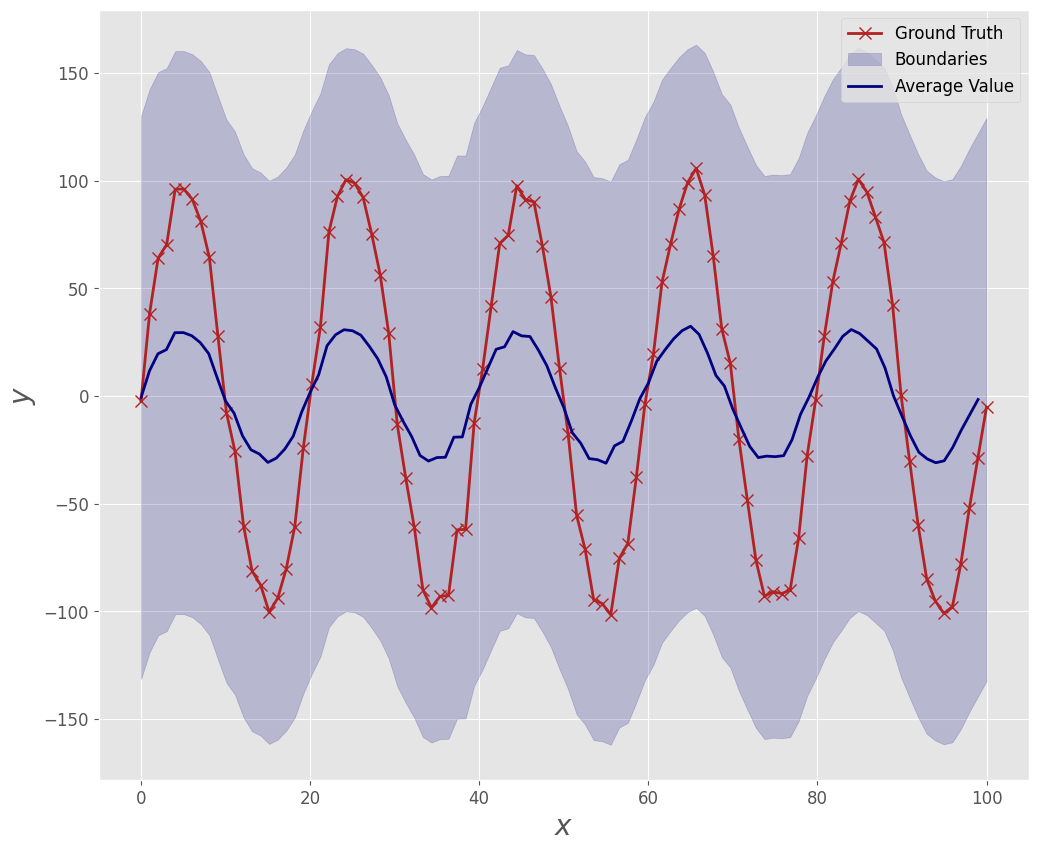

In [14]:
kernel = 1.0 * RBF(length_scale=10) + WhiteKernel(noise_level=1)
xtestinput = xtest.reshape(-1,1)
gp = GaussianProcessRegressor(kernel=kernel).fit(xtestinput, ytest)
meantest,vartest = gp.predict(xtestinput,return_std = True)
plt.plot(xtest,ytest,color='firebrick',label='Ground Truth',marker='x')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$y$',fontsize=20)
plt.fill_between(xtest,meantest-1.96*vartest,meantest+1.96*vartest,color='navy',alpha=0.2,label='Boundaries')
plt.plot(meantest,label='Average Value',color='navy')
plt.legend();

In [15]:
def fit_gpr(data_input,l=None,n=None,ask_for_result = True):
    mean_list = []
    var_list = []
    gpr_list = []
    dataframe = data_input['Dataframe']
    data_matrix = data_input['Data']
    n_t = len(data_matrix[0])
    T = data_matrix[0]
    if l==None or n==None:
        kernel = 1.0 * RBF() + WhiteKernel()
    else:
        kernel = 1.0 * RBF(length_scale=l) + WhiteKernel(noise_level=n)
    l = len(dataframe)
    l_print_first = len(dataframe)*0.1
    l_print = np.linspace(l_print_first,len(dataframe)+l_print_first,10).astype(int)
    l_print = l_print.tolist()
    perc = np.linspace(10,100,10).astype(int)
    for i in range(l):
        prova_x = np.array(dataframe.loc[i])
        prova_x = prova_x.reshape((n_t,1))
        gpr = GaussianProcessRegressor(kernel=kernel).fit(T, prova_x)
        gpr_list.append(gpr)
        mean,var = gpr.predict(T,return_std=True)
        mean_list.append(mean)
        var_list.append(var)
        if i in l_print:
            ind = l_print.index(i)
            perc_value = perc[ind]
            print("%.0f%% of points have been processed!" %(perc_value))
    print('100% of the data has been processed!')
    if ask_for_result == True:
        result = {'Models': gpr_list, 'Mean Values':mean_list,'Var Values':var_list}
    else:
        result = {'Models':gpr_list}
    return result



In [16]:
def gpr_predict(fitted_model,test_data):
    gpr_list = fitted_model['Models']
    T = test_data[0]
    points_per_t = len(test_data[1][0])
    T = np.array(T)
    T = T.reshape(-1,1)
    X = np.linspace(0,10*np.pi,points_per_t).reshape(-1,1)
    mean_list = []
    var_list = []
    for i in range(len(X)):
        gpr_model = gpr_list[i]
        mean,var = gpr_model.predict(T,return_std=True)
        mean_list.append(mean)
        var_list.append(var)
    mean_list = np.array(mean_list)
    var_list = np.array(var_list)
    mean_list = mean_list.T[0]
    var_list = var_list.T
    result = {'Mean':mean_list,'Variance':var_list}
    return result

In [20]:
def evaluate_performance(pred_test,test_set):
    mean_pred = pred_test['Mean']
    test_value = test_set[1]
    t_value = test_set[0]
    mse_list = []
    for i in range(len(test_value)):
        a_i = test_value[i]
        b_i = mean_pred[i]
        mse_list.append(mse(a_i,b_i))
    var_pred = pred_test['Variance']
   
    in_list = []
    out_list = []
    for i in range(len(test_value)):
        in_list_i=0
        out_list_i= 0
        for j in range(len(mean_pred[i])):
            mean_i_j = mean_pred[i][j]
            var_i_j = var_pred[i][j]
            upper_limit = mean_i_j+1.96*var_i_j
            lower_limit = mean_i_j-1.96*var_i_j

            ref_value = test_value[i][j]
            if ref_value<upper_limit and ref_value>lower_limit:
                in_list_i = in_list_i+1
            else:
                out_list_i = out_list_i+1
        in_list.append(in_list_i)
        out_list.append(out_list_i)
    return {'T':t_value,'mselist':mse_list,'inpoints':in_list,'outpoints':out_list}

In [21]:
def complete_experiment(temp_value=100, num_value=50, l_value=None,n_value=None):
    data = generate_train_data(temp_value,num_value)
    fitted_gpr = fit_gpr(data,l=l_value,n=n_value)
    test = generate_test_data(data)
    prediction = gpr_predict(fitted_gpr, test_data = test)
    p = evaluate_performance(prediction,test)
    return p,prediction

In [22]:
complete_experiment()

C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


10% of points have been processed!
20% of points have been processed!
30% of points have been processed!
40% of points have been processed!
50% of points have been processed!
60% of points have been processed!


C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


70% of points have been processed!


C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


80% of points have been processed!
90% of points have been processed!
100% of the data has been processed!


C:\Users\edier\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


InvalidParameterError: The 'y_pred' parameter of mean_squared_error must be an array-like. Got 0.0 instead.

In [23]:
def one_experiment(train_data,test_data,temp_value=100, num_value=50, l_value=None,n_value=None):
    fitted_gpr = fit_gpr(train_data,l=l_value,n=n_value)
    prediction = gpr_predict(fitted_gpr, test_data = test_data)
    p = evaluate_performance(prediction,test_data)
    return p

In [24]:
def grid_search(l_list,n_list,temp_value=100, num_value=50):
    train_data = generate_train_data(temp_value,num_value)
    test_data = generate_test_data(train_data)
    p_list = []
    l_n = []
    for l in l_list:
        for n in n_list:
            print('Experiment starting for l=%.3f and n=%.3f'%(l,n))
            p_list.append(one_experiment(train_data = train_data, test_data=test_data,l_value=l,n_value=n))
            l_n.append([l,n])
    result = {'Performance':p_list,'LN grid':l_n}
    return result

In [ ]:
grid_search_result = grid_search(np.linspace(0,1,3),[0.1,0.01,0.001])

In [ ]:
mse_list_mean = []
in_list_mean = []
perf_list = grid_search_result['Performance']
for i in range(len(perf_list)):
    mse_list_mean.append((np.array(perf_list[i]['mselist']).mean()))
    in_list_mean.append((np.array(perf_list[i]['inpoints']).mean()))
grid_ln = pd.DataFrame(grid_search_result['LN grid'],columns=['L','N'])
grid_ln['MSE'] = mse_list_mean
grid_ln = grid_ln.pivot("L","N","MSE")
plt.title('Average Mean Squared Error plot',fontsize=20)
sns.heatmap(grid_ln,annot=True)

In [ ]:
grid_ln = pd.DataFrame(grid_search_result['LN grid'],columns=['L','N'])
grid_ln['inpoints'] = in_list_mean
grid_ln = grid_ln.pivot("L","N","inpoints")
plt.title('Boundary included points',fontsize=20)
sns.heatmap(grid_ln,annot=True)

In [ ]:
l_opt = 0.5
n_opt = 0.01
perf, result, target = complete_experiment(l_value=l_opt,n_value=n_opt)

In [ ]:
plt.title('Optimal Prediction')
plt.plot(result['Mean'][0],color='firebrick',label='Predicted')
plt.fill_between(np.arange(0,len(target[1][0]),1),result['Mean'][0]-1.96*result['Variance'][0],result['Mean'][0]+1.96*result['Variance'][0],color='firebrick',alpha=0.2,label='Boundary')
plt.plot(np.arange(0,len(target[1][0]),1),target[1][0],'x',color='navy',label='Real')

In [ ]:
np.array(perf['mselist']).mean(), np.array(perf['inpoints']).mean()